In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# **DATA CLEANING**

## *Import data*

<h3><center> 2015 Flight Data </center></h3>

In [2]:
#read flight information data from 2015
flights_df=pd.read_csv(r"C:\Users\kirst\Desktop\Capstone2\FlightDelays\flights.csv", header = 0, low_memory=False)


In [3]:
#remove zeros from delay variables

flights_df['AIRLINE_DELAY']=flights_df['AIRLINE_DELAY'].replace(0, np.nan)
flights_df['LATE_AIRCRAFT_DELAY']=flights_df['LATE_AIRCRAFT_DELAY'].replace(0, np.nan)
flights_df['WEATHER_DELAY']=flights_df['WEATHER_DELAY'].replace(0, np.nan)
flights_df['AIR_SYSTEM_DELAY']=flights_df['AIR_SYSTEM_DELAY'].replace(0, np.nan)
flights_df['SECURITY_DELAY']=flights_df['SECURITY_DELAY'].replace(0, np.nan)


<h3><center> Airline Description </center></h3>

In [4]:
#read airline codes and descriptions
airlines_df=pd.read_csv(r"C:\Users\kirst\Desktop\Capstone2\FlightDelays\datasets_810_1496_airlines.csv", header = 0)
airlines_df.rename(columns={"IATA_CODE": "AIRLINE", "AIRLINE": "airline_name"}, inplace = True)
airlines_df.head()

,AIRLINE,airline_name
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


<h3><center> Airport Information </center></h3>

In [5]:
#read airport information
airports_df=pd.read_csv(r"C:\Users\kirst\Desktop\Capstone2\FlightDelays\aiport_codes.csv", header = 0)
airports_df.head()

,IATA_CODE,5DIGIT_IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ADK,10165,Adak Airport,Adak,AK,USA,51.87796,-176.64603
1,ANC,10299,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,BRW,10754,Wiley Post-Will Rogers Memorial Airport,Barrow,AK,USA,71.28545,-156.76600
3,BET,10551,Bethel Airport,Bethel,AK,USA,60.77978,-161.83800
4,CDV,10926,Merle K. (Mudhole) Smith Airport,Cordova,AK,USA,60.49183,-145.47765


<h3><center> Merge all 3 dataframes together using a left join on flights_df to create df with all information. </center></h3>

<h3><center> Add airline_name to dataframe </center></h3>



In [6]:
#Merge flight data with airline data using a left join to bring in the airline name into the dataframe

#merge flight data with airline data
df_flightsairlines = pd.merge(flights_df, airlines_df, how='left', on=['AIRLINE'])
### Add airline_name to dataframe 
#Merge flight data with airline data using a left join to bring in the airline name into the dataframe
df_flightsairlines.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,airline_name
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


<h3><center> Add ORIGIN AIRPORT information to dataframe </center></h3>



In [7]:
#Merge the new dataframe created above with the airports data using a left join to bring in Origin Airport information. Rename columns to include Origin in the name.

#merge flight and airline data with origin_airport information
origin_airport_df = pd.merge(df_flightsairlines, airports_df, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
origin_airport_df.rename(columns={'5DIGIT_IATA_CODE': 'ORIGIN_5DIGIT_IATA_CODE', 'AIRPORT': 'ORIGIN_AIRPORT_DESC', 'CITY': 'ORIGIN_CITY', 'STATE': 'ORIGIN_STATE', 'LATITUDE': 'ORIGIN_LATITUDE', 'LONGITUDE': 'ORIGIN_LONGITUDE'}, inplace = True)
origin_airport_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,airline_name,IATA_CODE,ORIGIN_5DIGIT_IATA_CODE,ORIGIN_AIRPORT_DESC,ORIGIN_CITY,ORIGIN_STATE,COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,Alaska Airlines Inc.,ANC,10299.0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,American Airlines Inc.,LAX,12892.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,US Airways Inc.,SFO,14771.0,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,American Airlines Inc.,LAX,12892.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,Alaska Airlines Inc.,SEA,14747.0,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


<h3><center> Add DESTINATION_AIRPORT information to dataframe </center></h3>
<ul>
<li>Merge the new dataframe created above with the airports data again using a left join to bring in Destination Airport information. Rename columns to include Destination in the name.</li>
<li>Added new column 'month_s' to dataframe with abbreviated name of the month.</li>
</ul>

In [8]:
#merge destination_airport info with flight, airline, and origin_airport information
destination_airport_df = pd.merge(origin_airport_df, airports_df, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

#add month name to dataframe
destination_airport_df['month_s'] = pd.to_datetime(destination_airport_df['MONTH'], format='%m').dt.month_name().str.slice(stop=3)

<h3><center> Delete duplicate columns </center></h3>

In [9]:
#rename new destination airport columns to include destination
destination_airport_df.rename(columns={'AIRPORT': 'DESTINATION_AIRPORT_DESC', 'CITY': 'DESTINATION_CITY', 'STATE': 'DESTINATION_STATE', 'LATITUDE': 'DESTINATION_LATITUDE', 'LONGITUDE': 'DESTINATION_LONGITUDE', '5DIGIT_IATA_CODE': 'DESTINATION_5DIGIT_IATA_CODE'}, inplace = True)

 #delete duplicate columns from dataframe
del destination_airport_df['IATA_CODE_x']
del destination_airport_df['COUNTRY_y']
del destination_airport_df['IATA_CODE_y']

destination_airport_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5823754 entries, 0 to 5823753
Data columns (total 46 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   YEAR                          int64  
 1   MONTH                         int64  
 2   DAY                           int64  
 3   DAY_OF_WEEK                   int64  
 4   AIRLINE                       object 
 5   FLIGHT_NUMBER                 int64  
 6   TAIL_NUMBER                   object 
 7   ORIGIN_AIRPORT                object 
 8   DESTINATION_AIRPORT           object 
 9   SCHEDULED_DEPARTURE           int64  
 10  DEPARTURE_TIME                float64
 11  DEPARTURE_DELAY               float64
 12  TAXI_OUT                      float64
 13  WHEELS_OFF                    float64
 14  SCHEDULED_TIME                float64
 15  ELAPSED_TIME                  float64
 16  AIR_TIME                      float64
 17  DISTANCE                      int64  
 18  WHEELS_ON             

<h2><center> Completed DataFrame </center></h2>

In [10]:
df = destination_airport_df
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,COUNTRY_x,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_5DIGIT_IATA_CODE,DESTINATION_AIRPORT_DESC,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,month_s
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,USA,61.17432,-149.99619,14747.0,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Jan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,USA,33.94254,-118.40807,14027.0,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559,Jan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,USA,37.61900,-122.37484,11057.0,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,Jan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,USA,33.94254,-118.40807,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,USA,47.44898,-122.30931,10299.0,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Jan


<h3><center>Count number of NaN by column. </center></h3>
<ul>
<il> Large number of blank cells for CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY.</il>
<il>If an aircraft has a delay, the delay is recorded in minutes for that flight. If there is no delay, nothing is recorded explaining the large number of NaN for delays.</il>
</ul>

In [11]:
#number of null entries in each column
df.isna().sum()

YEAR                                  0
MONTH                                 0
DAY                                   0
DAY_OF_WEEK                           0
AIRLINE                               0
FLIGHT_NUMBER                         0
TAIL_NUMBER                       14721
ORIGIN_AIRPORT                        0
DESTINATION_AIRPORT                   0
SCHEDULED_DEPARTURE                   0
DEPARTURE_TIME                    86228
DEPARTURE_DELAY                   86228
TAXI_OUT                          89123
WHEELS_OFF                        89123
SCHEDULED_TIME                        6
ELAPSED_TIME                     105162
AIR_TIME                         105162
DISTANCE                              0
WHEELS_ON                         92602
TAXI_IN                           92602
SCHEDULED_ARRIVAL                     0
ARRIVAL_TIME                      92602
ARRIVAL_DELAY                    105162
DIVERTED                              0
CANCELLED                             0


# **INSIGHTS**

In [12]:
#create variable lists
delays = ['AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY'] #all delays
weather_security = ['SECURITY_DELAY','WEATHER_DELAY'] #outside airlines control
aircraft_delays=['AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','AIR_SYSTEM_DELAY', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY'] #within airlines control
cancel_diverted = ['DIVERTED','CANCELLED'] 
all_variables = ['DIVERTED','CANCELLED','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY']

In [13]:
#sort data to plot
diverted_sums = df.groupby(['airline_name']).sum()['DIVERTED']
diverted_sumsdf = pd.DataFrame({'Diverted':diverted_sums})
diverted_df = diverted_sumsdf.sort_values(by='Diverted', ascending=False)

#sort data to plot
cancelled_sums = df.groupby(['airline_name']).sum()['CANCELLED']
cancelled_sumsdf=pd.DataFrame({'Cancelled':cancelled_sums})
cancelled_df = cancelled_sumsdf.sort_values(by='Cancelled', ascending=False)

#number of diverted and cancelled flights for all airlines
cancel_diverted_df = df.groupby(["airline_name"]).sum()[cancel_diverted]
cancel_diverted_sorteddf = cancel_diverted_df.sort_values(by='CANCELLED', ascending=False)

<h3><center> Total number of cancelled and diverted flights for all airlines in 2015. </center></h3>

<h4> Heatmap of airline and number of cancelled and diverted flights </h4>
<ul>
    <li>American Airlines and American Eagle are both in the top 5 for total cancelled flights. </li>
</ul>

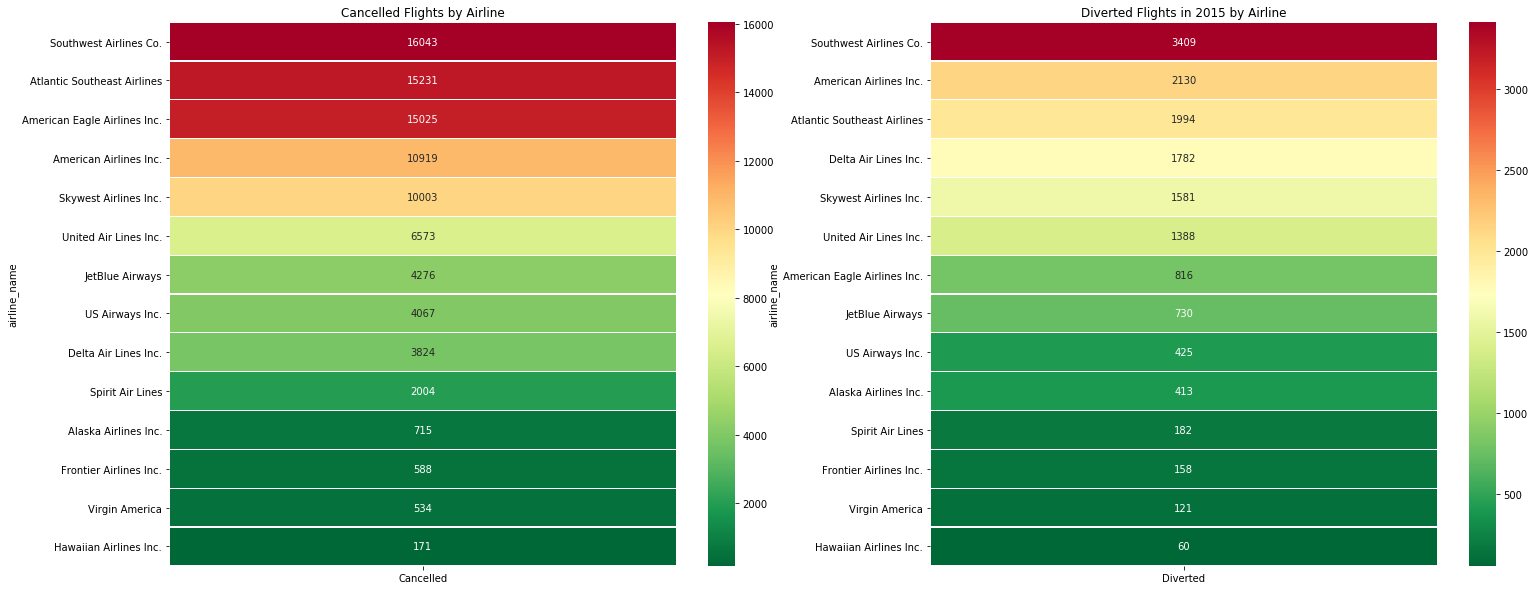

In [35]:
fig, axes=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = (35,15)
sns.heatmap(data=cancelled_df, annot=True, cmap='RdYlGn_r', linewidths=.1, fmt='g', ax=axes[0]).set_title('Cancelled Flights by Airline')
sns.heatmap(data=diverted_df, annot=True, cmap='RdYlGn_r', linewidths=.1, fmt='g',ax=axes[1]).set_title('Diverted Flights in 2015 by Airline')
plt.show()

<h4> Total number of diverted flights. </h4>

<ul>
    <li> American Airlines had 2,130 flights diverted in 2015. </li>
    <li> American Eagle had 816 diverted flights. </li>
    <li> Total of 2,946 diverted flights </li>
</ul>

<h4> Total number of cancelled flights. </h4>

<ul>
    <li> American Airlines had 10,919 cancelled flights in 2015. </li>
    <li> American Eagle Airlines had 15,025. </li> 
    <li> Total of 25,944 cancelled flights </li>
</ul>

<h3><center> Average Delays by Airline </center></h3>
<ul>
    <li> American Airlines and American Eagle Airlines delays are comparable to other airline delays </li>
    <li> Those two airlines don't stand out compared with other airlines </li>
</ul>

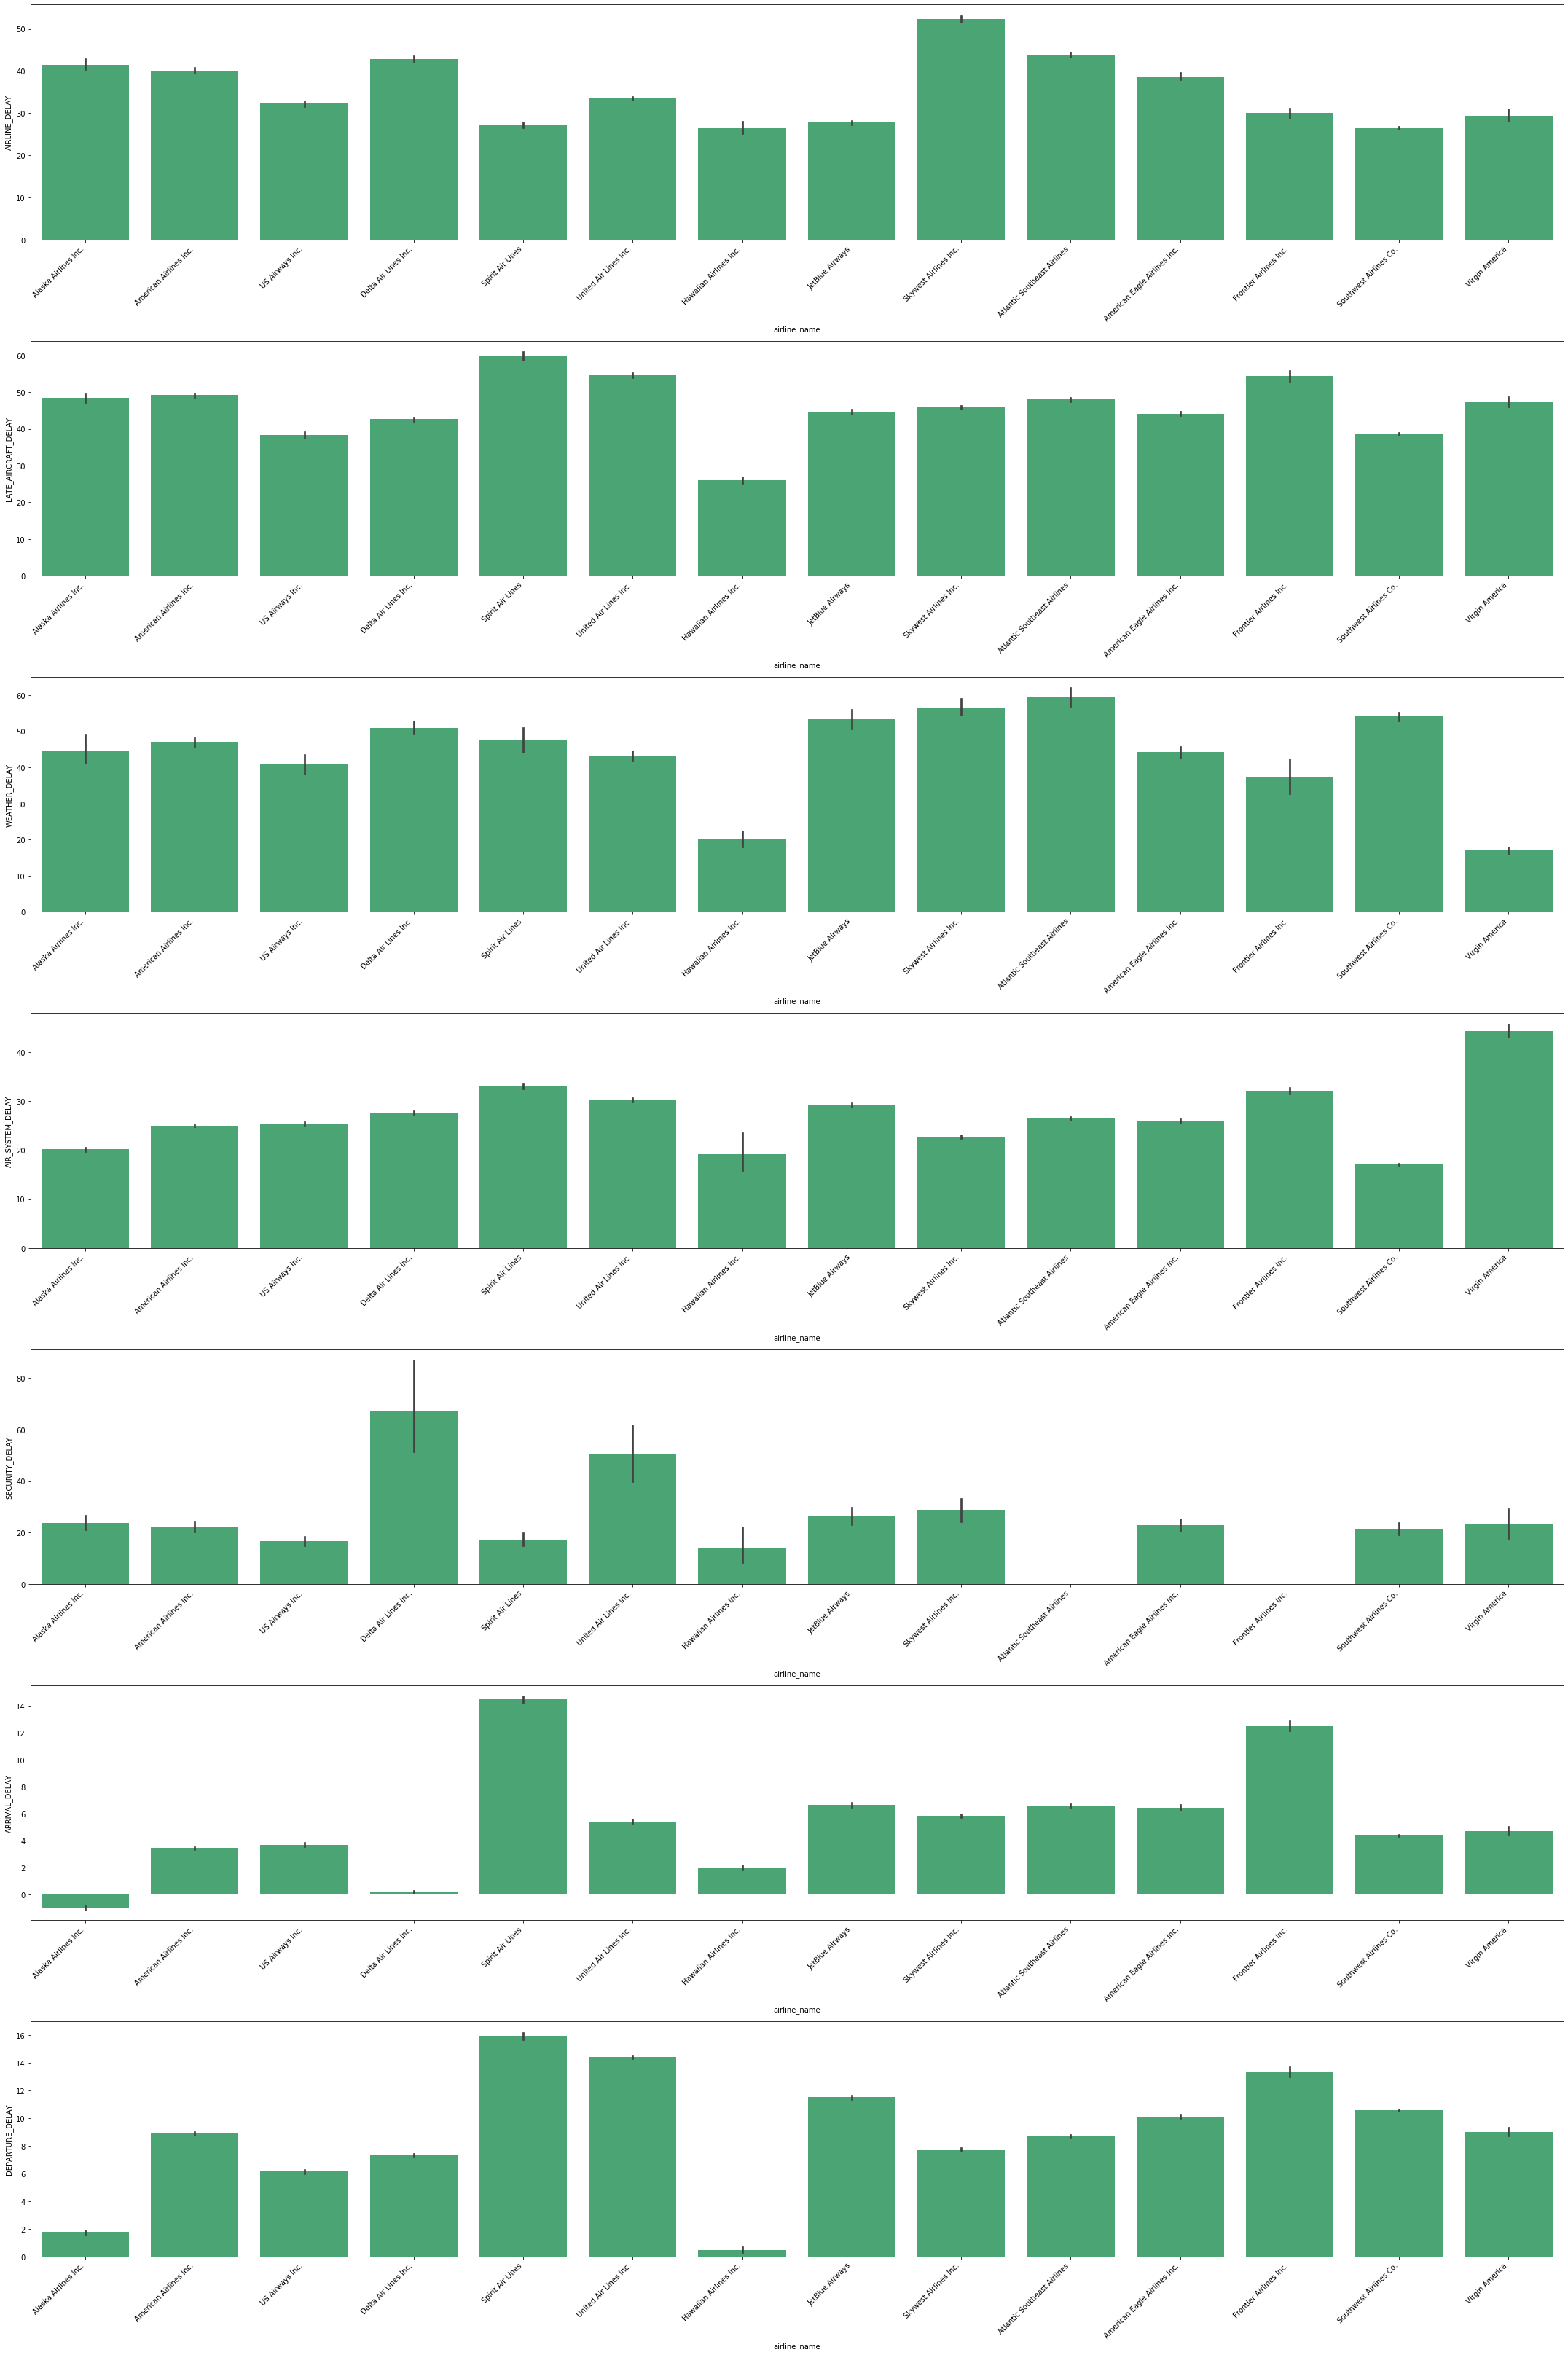

In [15]:
fig, axes = plt.subplots(7,1,figsize=(30,45))
#plt.suptitle("Average Delays by Airline", fontsize=30)
plt.xlabel('Airline')
for i, column in enumerate(delays):
    ax = sns.barplot(x='airline_name',y=column, data=df, ax=axes[i], color='mediumseagreen')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()

<h3><center> Average duration of delay in minutes by airline sorted by AIRLINE_DELAY </center></h3>

<h4> Heatmap of all delays by airline showing average duration of delay in minutes. </h4>
<ul>
    <li> LATE_AIRCRAFT_DELAY and WEATHER_DELAY have the highest average delay times for most airlines. </li> 
    <li> The cause for delay with American Airlines and American Eagle looks as though is more likely a result of LATE_AIRCRAFT_DELAY, WEATHER_DELAY, or AIRLINE_DELAY </li>
</ul>

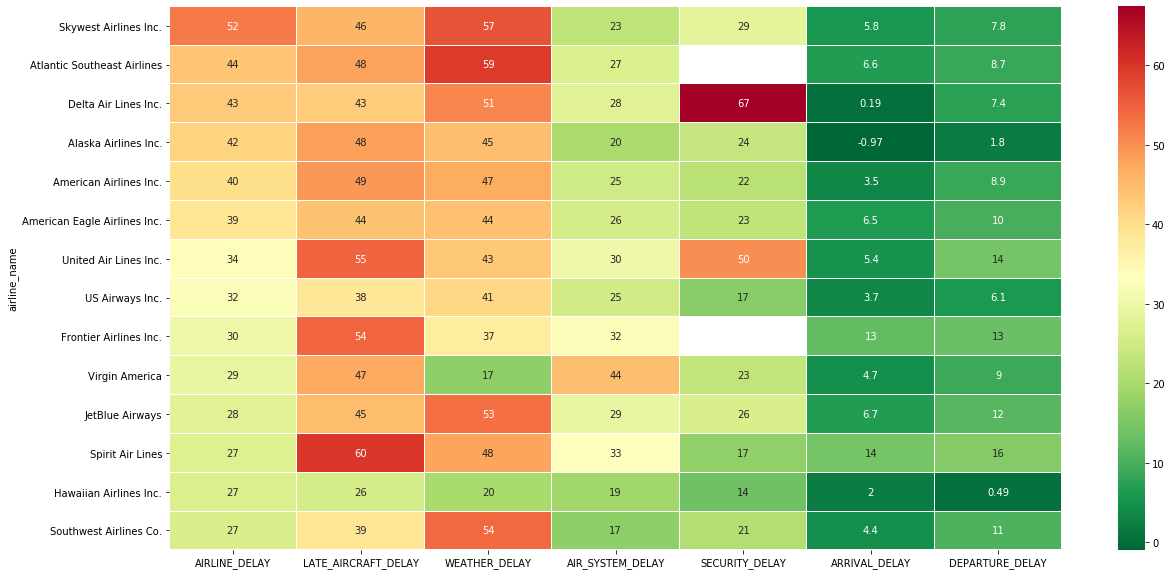

In [16]:
delayed_df = df.groupby(["airline_name"]).mean()[delays]
delayed_sorteddf = delayed_df.sort_values(by=['AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY'], ascending=False)

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(data=delayed_sorteddf, annot=True, cmap='RdYlGn_r', linewidths=.1)
plt.show()

<h3><center>Cancellation and Delay Reasons:</center></h3>
<ul>
<li>(A) Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).</li>
<li>(B) Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.</li>
<li>(C) National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.</li>
<li>(D) Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.</li>
<li>Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.</li>
</ul>

<h3><center> Cancellations </center></h3>
<ul>
    <li>By all cancellation codes</li>
    <li>By month</li>
    <li>By reasons within airlines control (cancel code: A)</li>
    <li>By reasons outside of airlines control (cancel codes: B, C, D) by origin and destination airports</li>
</ul>

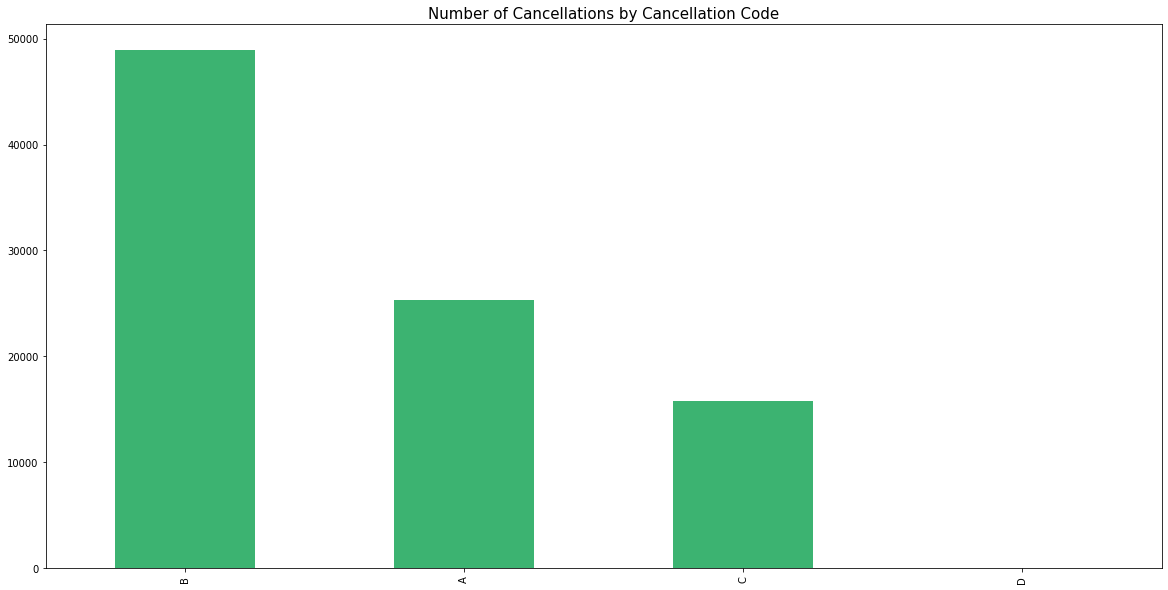

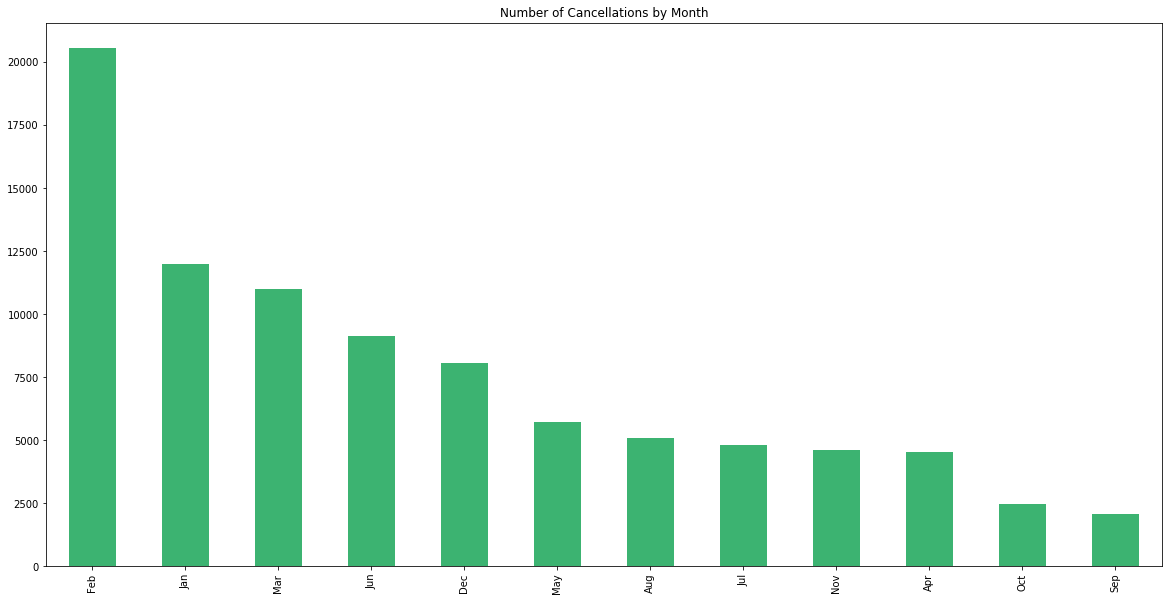

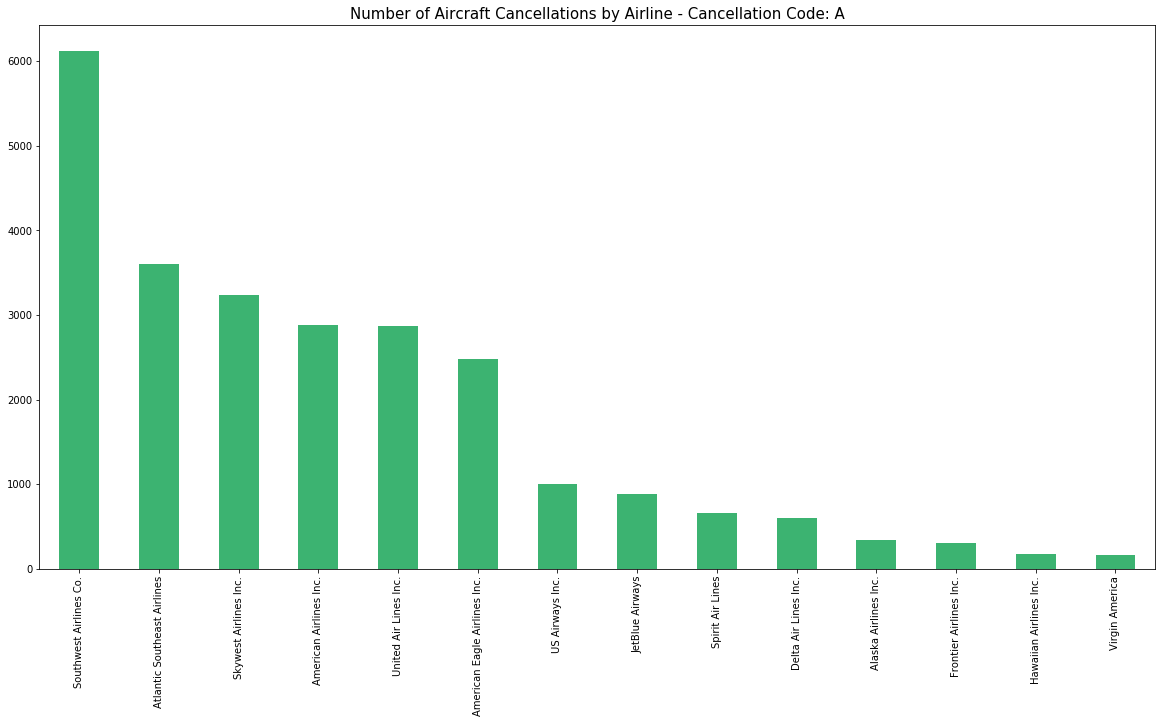

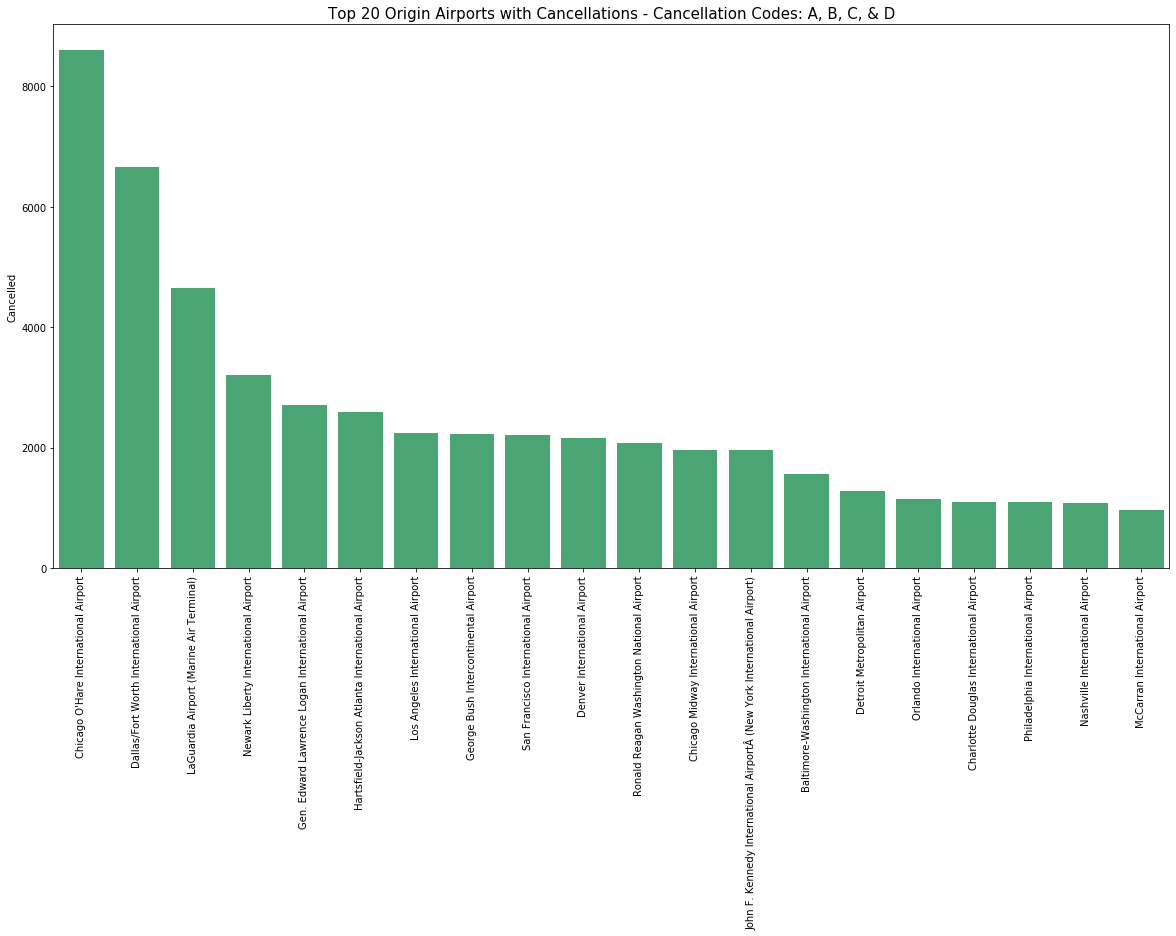

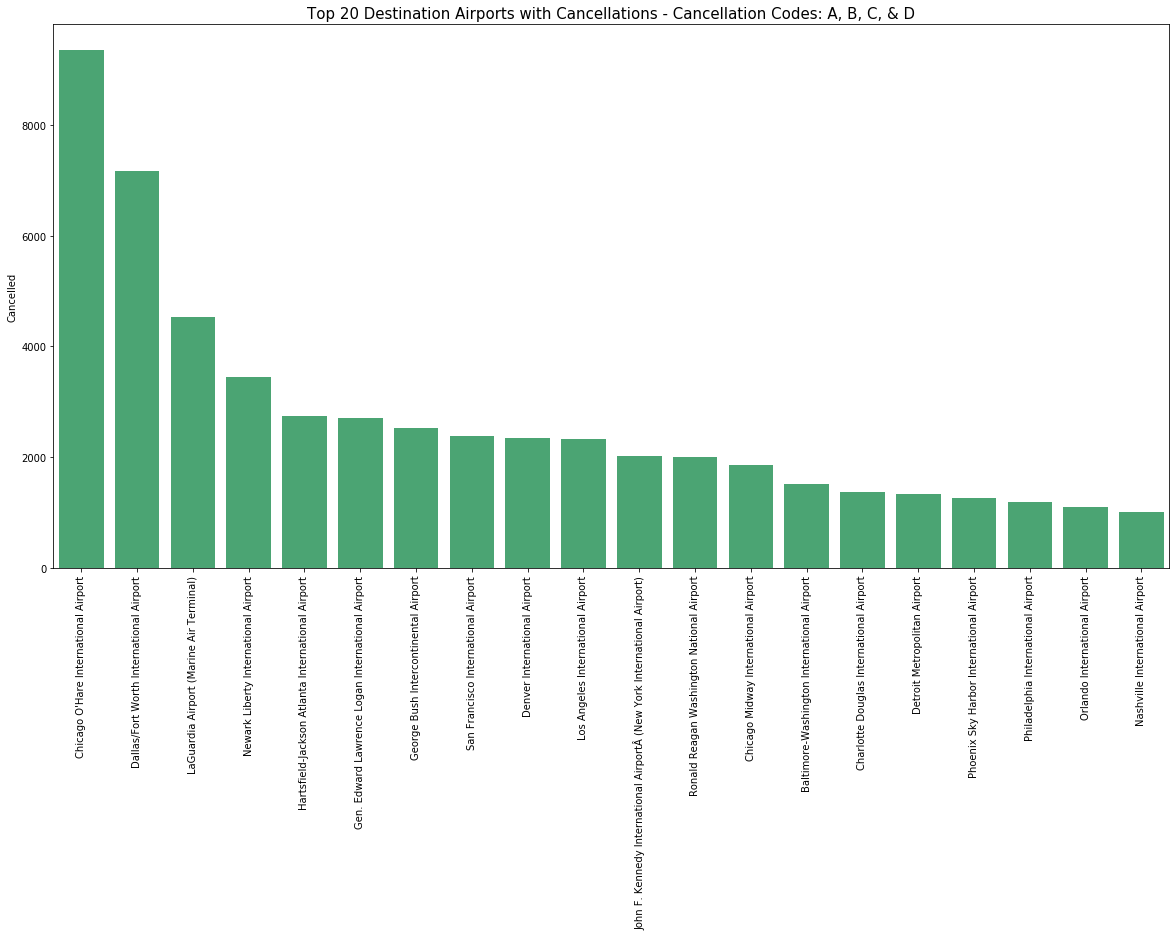

In [17]:
cancelcodes_df=df[df.CANCELLATION_REASON.isin(['A','B','C','D'])] #all cancellation codes
cancelcodes_aircraft_df=df[df.CANCELLATION_REASON.isin(['A'])] #cancellation due to circumstances within the airline's control
cancelcodes_other_df=df[df.CANCELLATION_REASON.isin(['B','C','D'])] #cancellations due to circumstances outside of the airline's control


plt.title("Number of Cancellations by Cancellation Code", fontsize=15)
cancelcodes_df['CANCELLATION_REASON'].value_counts().plot.bar(color='mediumseagreen')
plt.show()

plt.title("Number of Cancellations by Month")
cancelcodes_df['month_s'].value_counts().plot.bar(color='mediumseagreen')
plt.show()


plt.title("Number of Aircraft Cancellations by Airline - Cancellation Code: A", fontsize=15) 
cancelcodes_aircraft_df['airline_name'].value_counts().plot.bar(color='mediumseagreen') #within airlines control
plt.show()


plt.title("Top 20 Origin Airports with Cancellations - Cancellation Codes: A, B, C, & D", fontsize=15) 
originairport_counts_df = cancelcodes_df['ORIGIN_AIRPORT_DESC'].value_counts()
originairport_sums_df = pd.DataFrame({'Cancelled':originairport_counts_df})
originairport_top20 = originairport_sums_df.head(20)

sns.barplot(x=originairport_top20.index, y='Cancelled', data=originairport_top20, color='mediumseagreen') #outside airlines control
plt.xticks(rotation=90)
plt.show()


plt.title("Top 20 Destination Airports with Cancellations - Cancellation Codes: A, B, C, & D", fontsize=15) 
destinationairport_counts_df = cancelcodes_df['DESTINATION_AIRPORT_DESC'].value_counts()
destinationairport_sums_df = pd.DataFrame({'Cancelled':destinationairport_counts_df})
destinationairport_top20 = destinationairport_sums_df.head(20)

sns.barplot(x=destinationairport_top20.index, y='Cancelled', data=destinationairport_top20, color='mediumseagreen') #outside airlines control
plt.xticks(rotation=90)
plt.show()


<ul>
    <li> Cancel code (B) Extreme Weather is the most common reason for a flight cancellation. </li> 
    <li>Most flights are cancelled in the first few months of the year (Jan, Feb, March) which makes sense as those are winter months where extreme weather is more common. </li> 
    <li>American Airlines and American Eagle Airlines are of the top airlines with cancelled flights in 2015. </li> 
    <li>Chicago, Dallas, LaGuardia, Newark Liberty are the top 4 airports for destination and origin with cancelled flights. </li>
</ul>


<h2><center> Descriptive Statistics of Delay Variables </center></h2>

In [18]:
df[delays].describe()

,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,ARRIVAL_DELAY,DEPARTURE_DELAY
count,570226.000000,557232.000000,64735.000000,565127.000000,3499.000000,5.718592e+06,5.737526e+06
mean,35.397620,44.819217,47.905708,25.374822,23.269220,4.405385e+00,9.363889e+00
std,61.215561,51.048535,68.594520,34.263536,29.374217,3.926448e+01,3.707597e+01
min,1.000000,1.000000,1.000000,1.000000,1.000000,-8.700000e+01,-8.200000e+01
25%,8.000000,15.000000,12.000000,7.000000,8.000000,-1.300000e+01,-5.000000e+00
50%,17.000000,28.000000,25.000000,17.000000,15.000000,-5.000000e+00,-2.000000e+00
75%,38.000000,57.000000,57.000000,29.000000,26.000000,8.000000e+00,7.000000e+00
max,1971.000000,1331.000000,1211.000000,1134.000000,573.000000,1.971000e+03,1.988000e+03


<h3><center> Boxplots </center></h3>
<ul>
    <li> Delay variables all have a large range from min to max points</li>
    <li> Each delay variable looks to have a lot of outliers </li>
</ul>


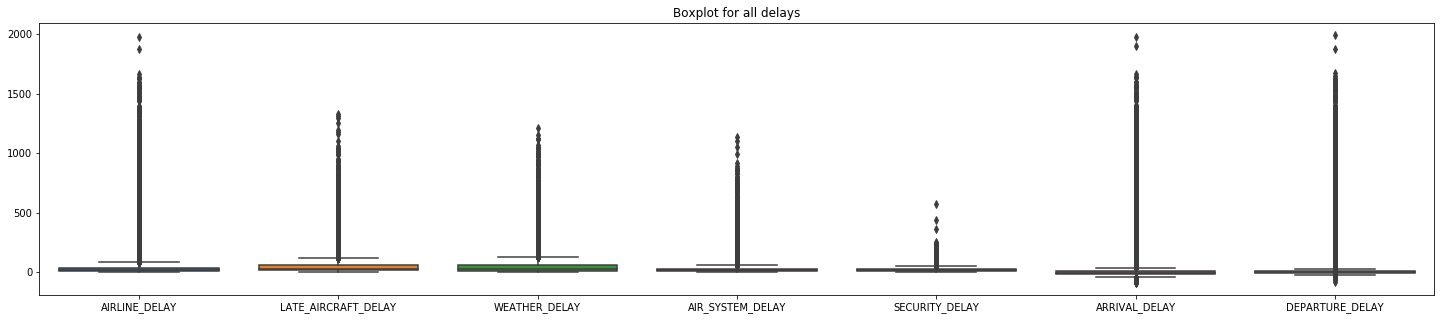

In [19]:
plt.figure(figsize=(25,5))
sns.boxplot(data=df[delays])
plt.title('Boxplot for all delays')
plt.show()

<h3><center> Histograms </center></h3>
<ul>
    <li> All histograms are skewed to the right </li>
    <li> When delays occur, on average, they do no last long </li>

C:\Users\kirst\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kirst\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


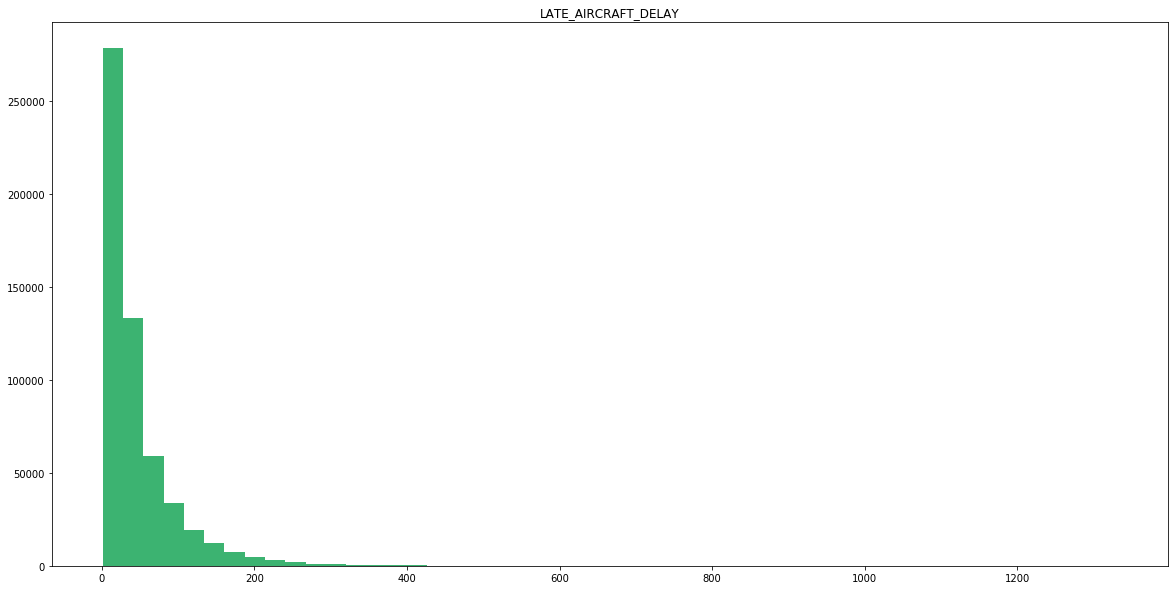

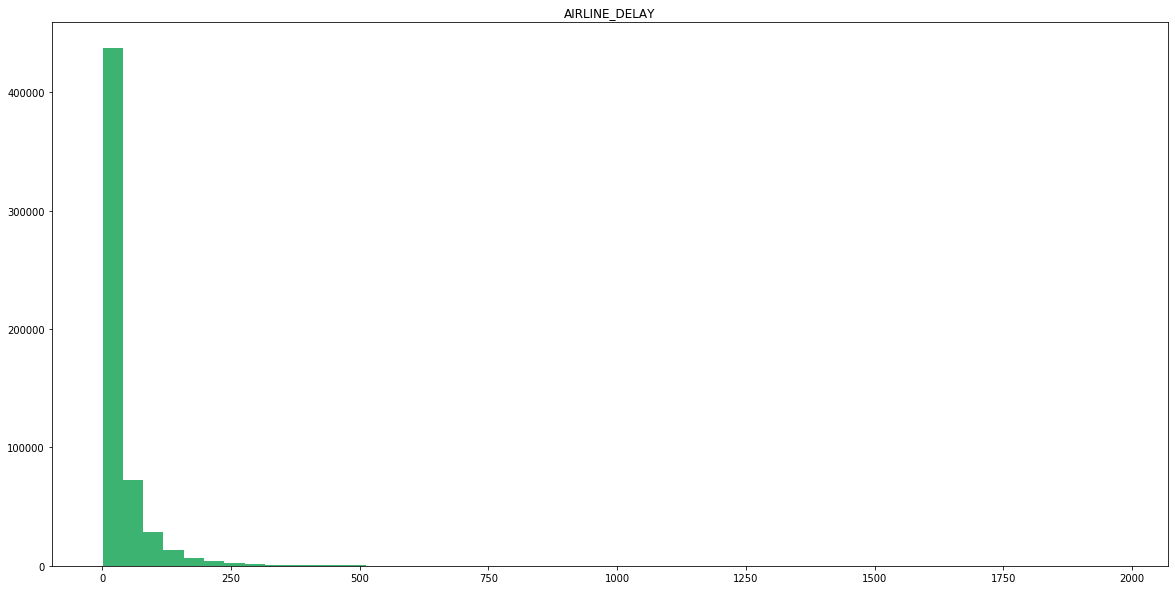

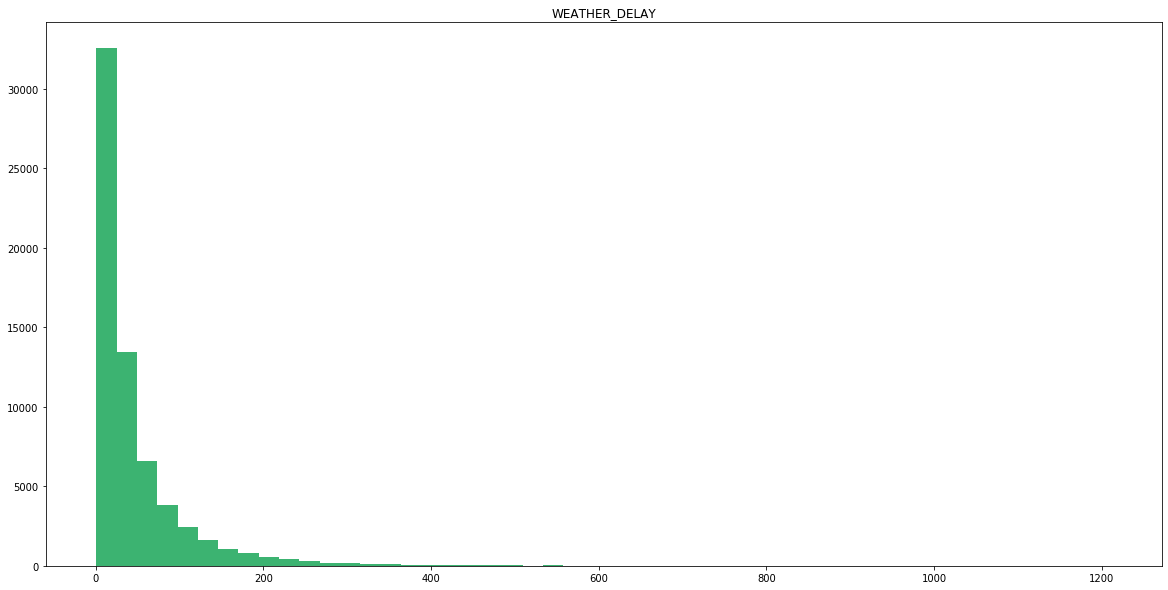

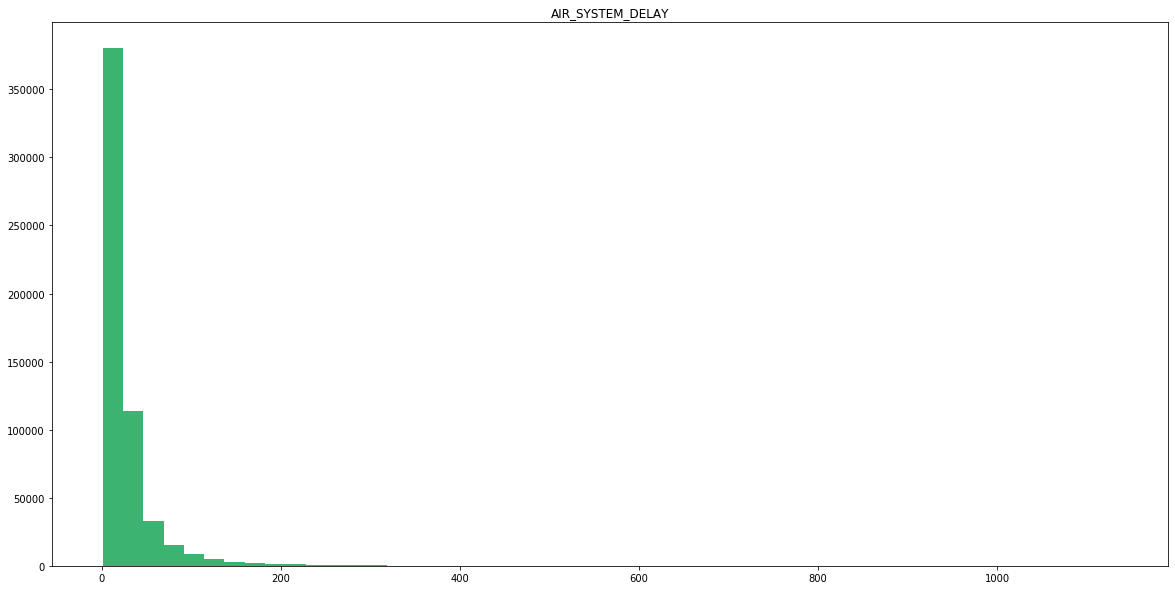

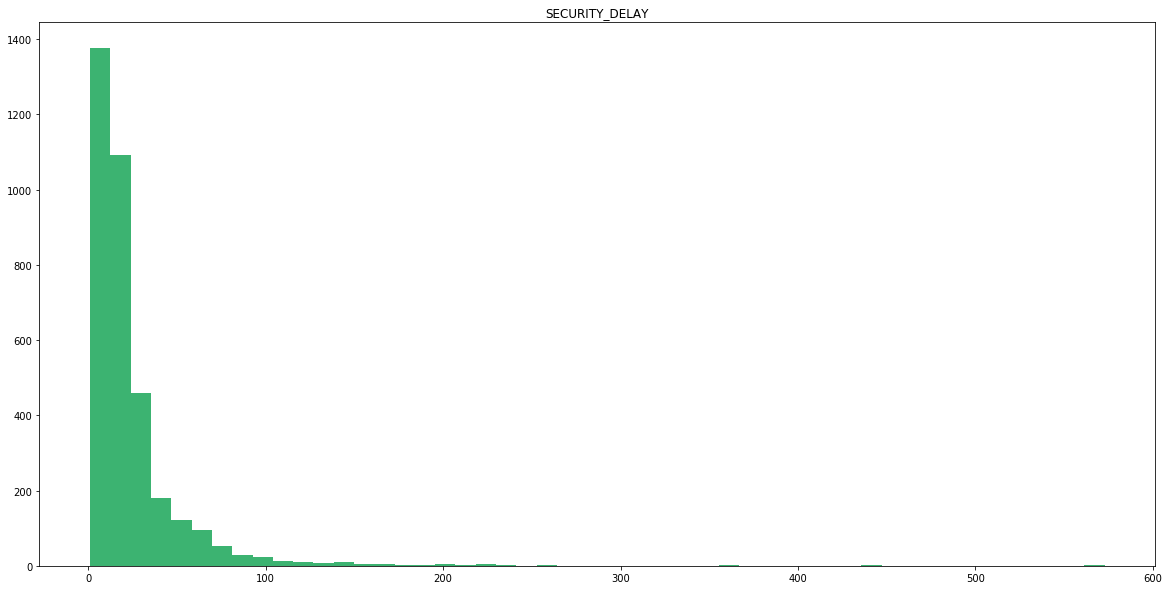

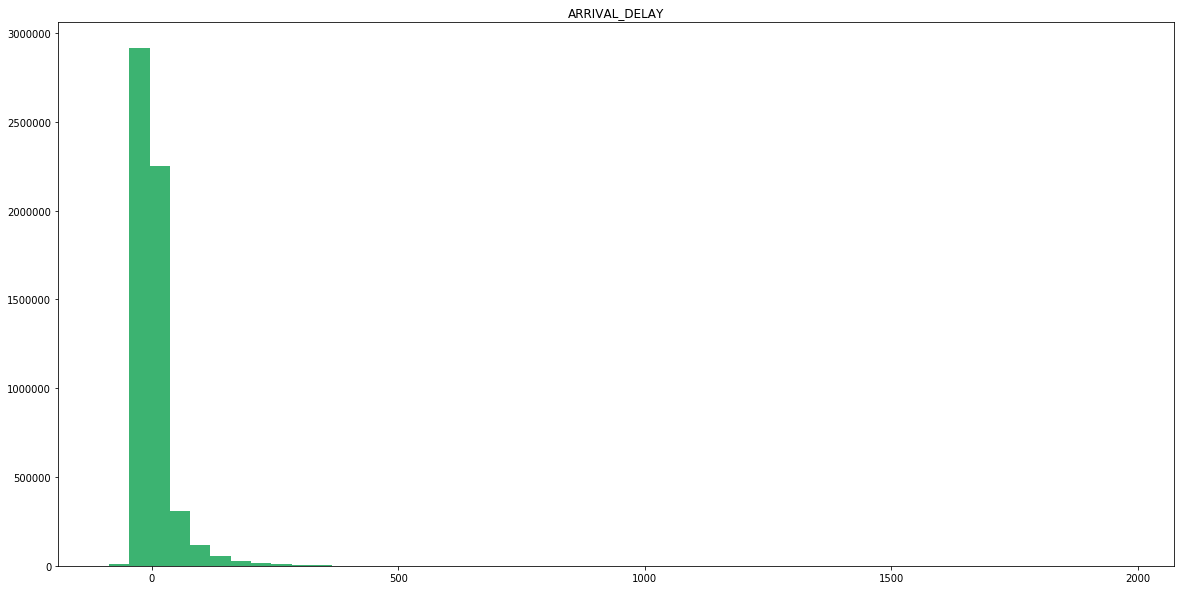

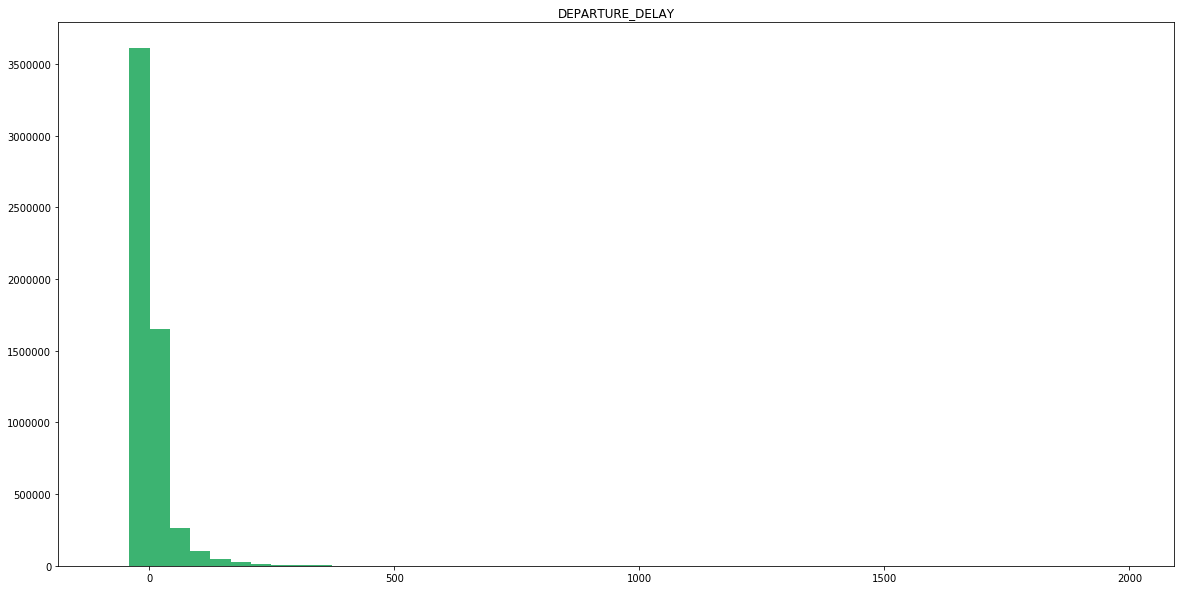

In [20]:
plt.title('LATE_AIRCRAFT_DELAY')
plt.hist(df['LATE_AIRCRAFT_DELAY'], bins=50, color='mediumseagreen')
plt.show()

plt.title('AIRLINE_DELAY')
plt.hist(df['AIRLINE_DELAY'], bins=50, color='mediumseagreen')
plt.show()

plt.title('WEATHER_DELAY')
plt.hist(df['WEATHER_DELAY'], bins=50, color='mediumseagreen')
plt.show()

plt.title('AIR_SYSTEM_DELAY')
plt.hist(df['AIR_SYSTEM_DELAY'], bins=50, color='mediumseagreen')
plt.show()

plt.title('SECURITY_DELAY')
plt.hist(df['SECURITY_DELAY'], bins=50, color='mediumseagreen')
plt.show()

plt.title('ARRIVAL_DELAY')
plt.hist(df['ARRIVAL_DELAY'], bins=50, color='mediumseagreen')
plt.show()

plt.title('DEPARTURE_DELAY')
plt.hist(df['DEPARTURE_DELAY'], bins=50, color='mediumseagreen')
plt.show()

<h3><center> Outliers </center></h3>

In [21]:
#calculating outliers
Q1=df[delays].quantile(.25)
Q3=df[delays].quantile(.75)
IQR=Q3-Q1
print(IQR)

AIRLINE_DELAY          30.0
LATE_AIRCRAFT_DELAY    42.0
WEATHER_DELAY          45.0
AIR_SYSTEM_DELAY       22.0
SECURITY_DELAY         18.0
ARRIVAL_DELAY          21.0
DEPARTURE_DELAY        12.0
dtype: float64


In [22]:
print ("When we have not removed any outliers from the dataset, we have " + str(df.shape[0]) + " entries")

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print ("When we have removed any outliers from the dataset, we have " + str(df_out.shape[0]) + " entries")
print("The proportion of outliers which exist when compared to the dataframe are: " +(str(df.shape[0] - df_out.shape[0])))

When we have not removed any outliers from the dataset, we have 5823754 entries
When we have removed any outliers from the dataset, we have 5035028 entries
The proportion of outliers which exist when compared to the dataframe are: 788726


<h3><center> Evaluating Extreme outliers </center></h3>

In [23]:
print ("When we have not removed any outliers from the dataset, we have " + str(df.shape[0]) + " entries")

df_extreme_out = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]

print ("When we have removed any outliers from the dataset, we have " + str(df_extreme_out.shape[0]) + " entries")
print("The proportion of outliers which exist when compared to the dataframe are: " +(str(df.shape[0] - df_extreme_out.shape[0])))

When we have not removed any outliers from the dataset, we have 5823754 entries
When we have removed any outliers from the dataset, we have 5347206 entries
The proportion of outliers which exist when compared to the dataframe are: 476548


<h1><center> American Airlines and American Eagle Airlines </center></h1>

<h4> Creating DataFrame for American Airlines and American Eagle Airlines </h4>

In [24]:
#creating dataframe with only American Airlines and American Eagle Airlines data.
american_df=df[df.AIRLINE.isin(['AA','MQ'])]
american_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,COUNTRY_x,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_5DIGIT_IATA_CODE,DESTINATION_AIRPORT_DESC,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,month_s
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,USA,33.94254,-118.40807,14027.0,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559,Jan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,USA,33.94254,-118.40807,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,USA,37.61900,-122.37484,11298.0,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,32.89595,-97.03720,Jan
11,2015,1,1,4,AA,1674,N853AA,LAS,MIA,35,...,USA,36.08036,-115.15233,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
21,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,100,...,USA,47.44898,-122.30931,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823706,2015,12,31,4,AA,1927,N837AW,LAX,IAD,2349,...,USA,33.94254,-118.40807,12264.0,Washington Dulles International Airport,Chantilly,VA,38.94453,-77.45581,Dec
5823710,2015,12,31,4,AA,675,N207UW,HNL,PHX,2350,...,USA,21.31869,-157.92241,14107.0,Phoenix Sky Harbor International Airport,Phoenix,AZ,33.43417,-112.00806,Dec
5823724,2015,12,31,4,AA,1538,N866AA,LAX,MIA,2355,...,USA,33.94254,-118.40807,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Dec
5823742,2015,12,31,4,AA,2342,N3DLAA,DEN,MIA,2359,...,USA,39.85841,-104.66700,13303.0,Miami International Airport,Miami,FL,25.79325,-80.29056,Dec


<h3><center> Cancellations of American Airlines and American Eagle Airlines </center></h3>
<ul> 
    <li> Most common cancellation reason is due to extreme weather followed by airline carrier (a cancellation that is within the airlines control) </li>
    <li> Airline with most cancellations is American Airlines which is to be expected because they are larger with more routes and scheduled flights. </li>
    <li> Cancellations usually occur during winter months (Dec - Mar) </li>
    <li> Chicago, Dallas, and LaGuardia the top 3 origin and destination airports for cancellations. They were also in the top 4 airports for destination and origin with cancellations for all airlines </li>
</ul>




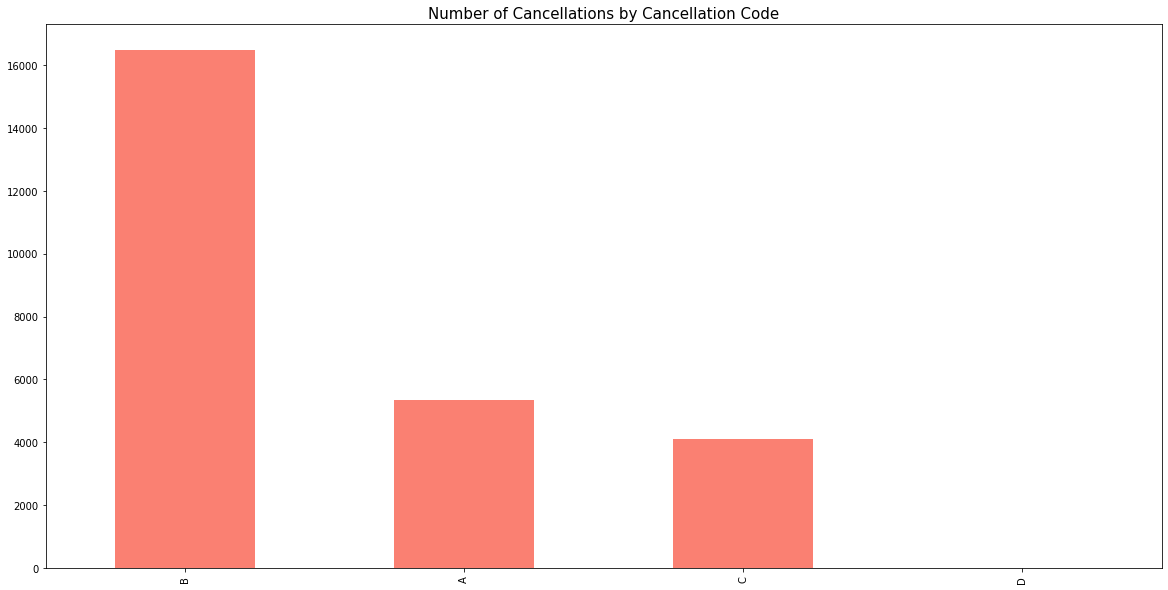

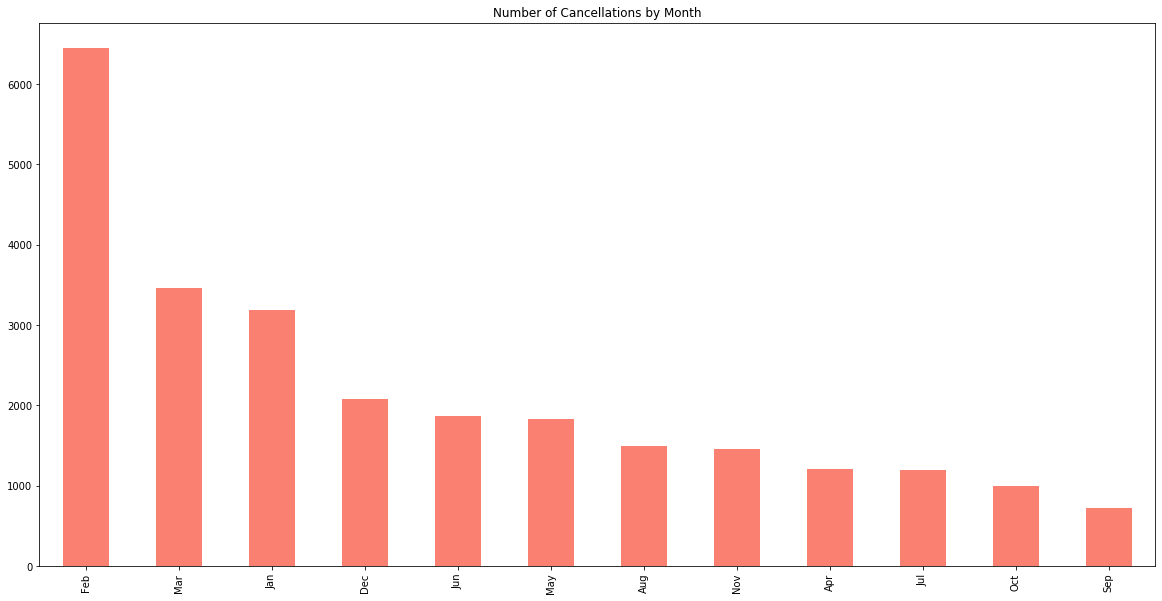

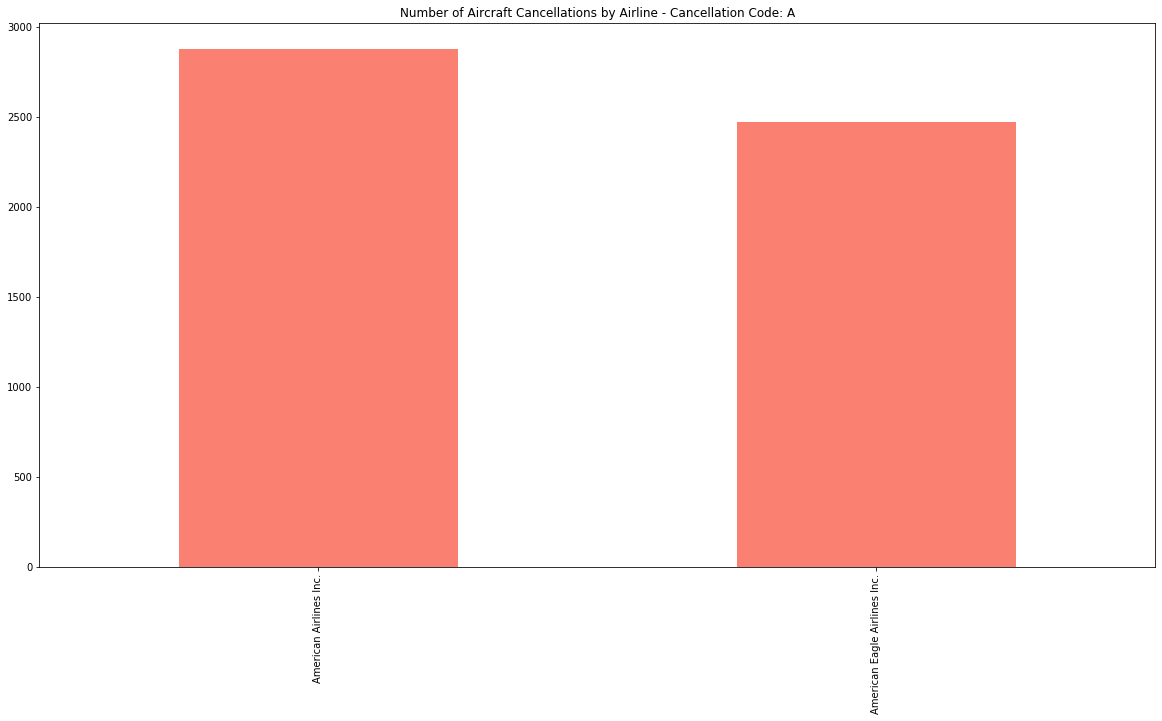

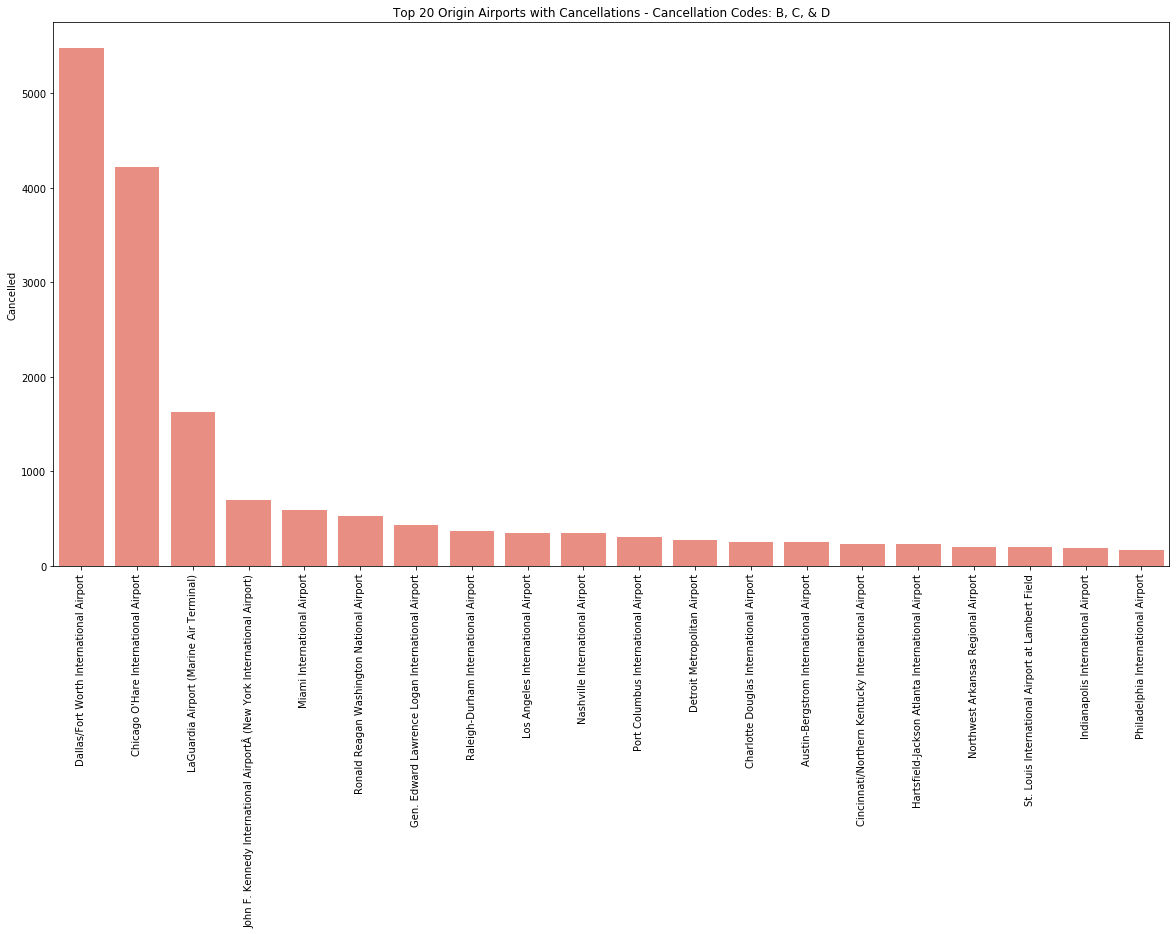

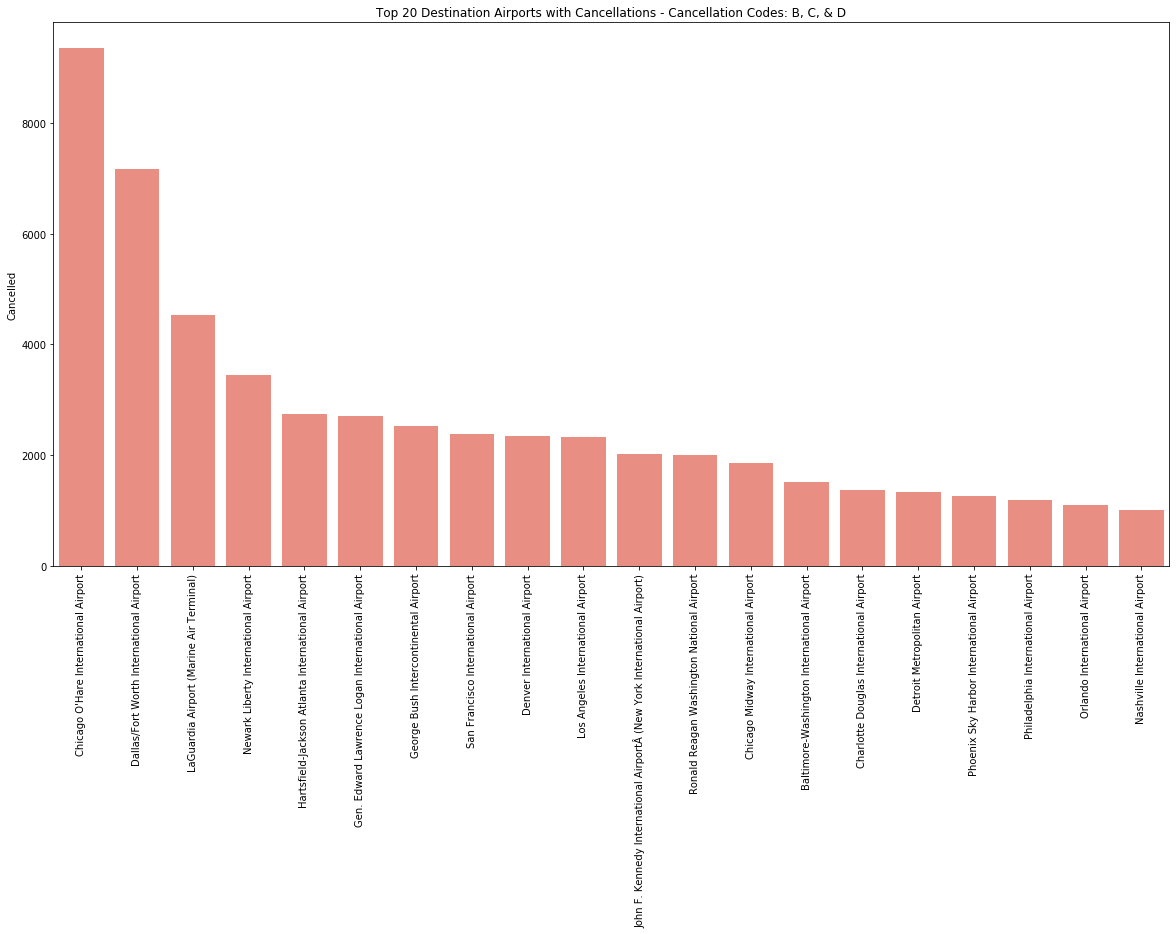

In [25]:
aa_cancelcodes_df=american_df[american_df.CANCELLATION_REASON.isin(['A','B','C','D'])] #all cancellation codes
aa_cancelcodes_aircraft_df=american_df[american_df.CANCELLATION_REASON.isin(['A'])] #cancellation due to circumstances within the airline's control
aa_cancelcodes_other_df=american_df[american_df.CANCELLATION_REASON.isin(['B','C','D'])] #cancellations due to circumstances outside of the airline's control

plt.title("Number of Cancellations by Cancellation Code", fontsize=15)
aa_cancelcodes_df['CANCELLATION_REASON'].value_counts().plot.bar(color='salmon')
plt.show()

plt.title("Number of Cancellations by Month")
aa_cancelcodes_df['month_s'].value_counts().plot.bar(color='salmon')
plt.show()

plt.title("Number of Aircraft Cancellations by Airline - Cancellation Code: A")
aa_cancelcodes_aircraft_df['airline_name'].value_counts().plot.bar(color='salmon') #within airlines control
plt.show()

plt.title("Top 20 Origin Airports with Cancellations - Cancellation Codes: B, C, & D")
aa_originairport_counts_df = aa_cancelcodes_df['ORIGIN_AIRPORT_DESC'].value_counts()
aa_originairport_sums_df = pd.DataFrame({'Cancelled':aa_originairport_counts_df})
aa_originairport_top20 = aa_originairport_sums_df.head(20)

sns.barplot(x=aa_originairport_top20.index, y='Cancelled', data=aa_originairport_top20, color='salmon') #outside of airlines control
plt.xticks(rotation=90)
plt.show()

plt.title("Top 20 Destination Airports with Cancellations - Cancellation Codes: B, C, & D")
aa_destinationairport_counts_df = cancelcodes_df['DESTINATION_AIRPORT_DESC'].value_counts()
aa_destinationairport_sums_df = pd.DataFrame({'Cancelled':aa_destinationairport_counts_df})
aa_destinationairport_top20 = aa_destinationairport_sums_df.head(20)

sns.barplot(x=aa_destinationairport_top20.index, y='Cancelled', data=aa_destinationairport_top20, color='salmon') #outside of airlines control
plt.xticks(rotation=90)
plt.show()


<h3><center> American Airlines and American Eagle Airlines Delays </center></h3>

**Heatmap to see which delays have higher average delay time for American Eagle Airlines and American Airlines.**
<ul>
    <li> AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY top 3 delays with longest average duration for both American Airlines and American Eagle Airlines. </li>
    <li> A DEPARTURE_DELAY has a longer average duration than ARRIVAL_DELAY which will be looked at by other origin and destination airports below. </li>
</ul>

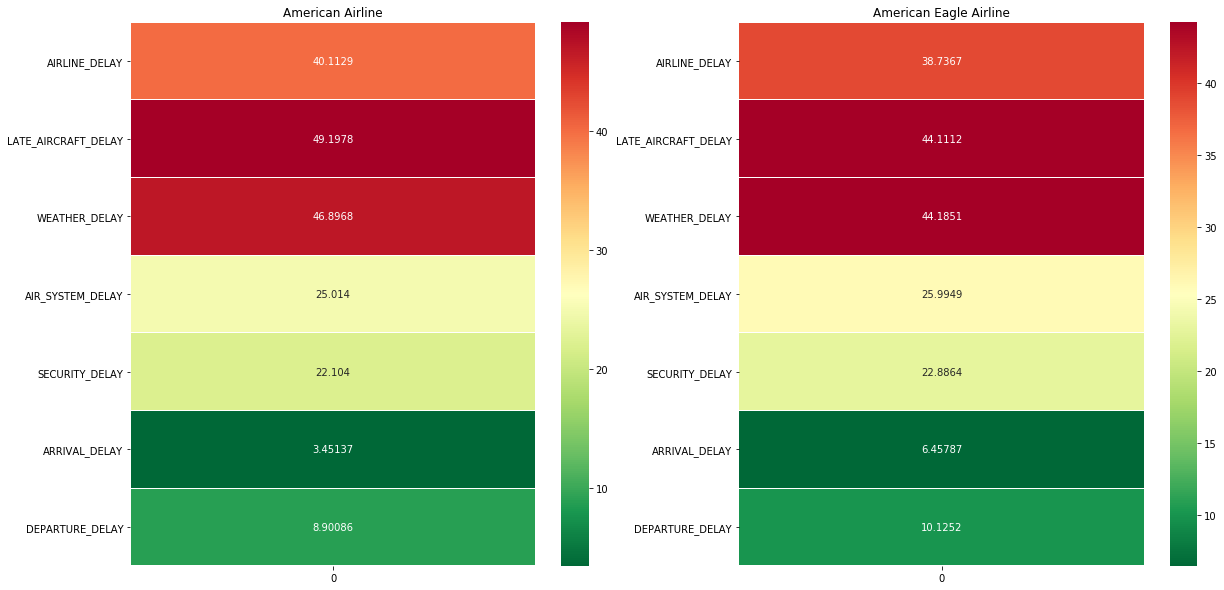

In [26]:
aa_df=df[df.AIRLINE.isin(['AA'])] #american airlines dataframe
mq_df=df[df.AIRLINE.isin(['MQ'])] #american eagle airlines dataframe

aa_avg=aa_df[delays].mean() #american airlines avg duration of a delay
mq_avg=mq_df[delays].mean() #american eagle airlines avg duration of a delay

aa_avgdata = pd.DataFrame(aa_avg) #create dataframe to plot
mq_avgdata = pd.DataFrame(mq_avg) #create dataframe to plot


fig, axes=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = (25,10)
sns.heatmap(data=aa_avgdata, annot=True, cmap='RdYlGn_r', linewidths=.1, fmt='g', ax=axes[0]).set_title('American Airline')
sns.heatmap(data=mq_avgdata, annot=True, cmap='RdYlGn_r', linewidths=.1, fmt='g', ax=axes[1]).set_title('American Eagle Airline')
plt.show()

**Average Delays by Month for delays with long average duration of delay for American Airline and American Eagle Airline**
<ul>
    <li> AIRLINE_DELAY and LATE_AIRCRAFT_DELAY do not look to have a lot of variation month to month. Could look for the overall cause of these delays to reduce average duration. </li>
    <li> There is variation in WEATHER_DELAYS which is to be expected with seasonal weather changes. The summer months have lower average duration of delay time.</li>
    <li> Did not look at AIR_SYSTEM_DELAY or SECURITY_DELAY as those don't have high average delay times in comparison </li>
</ul>


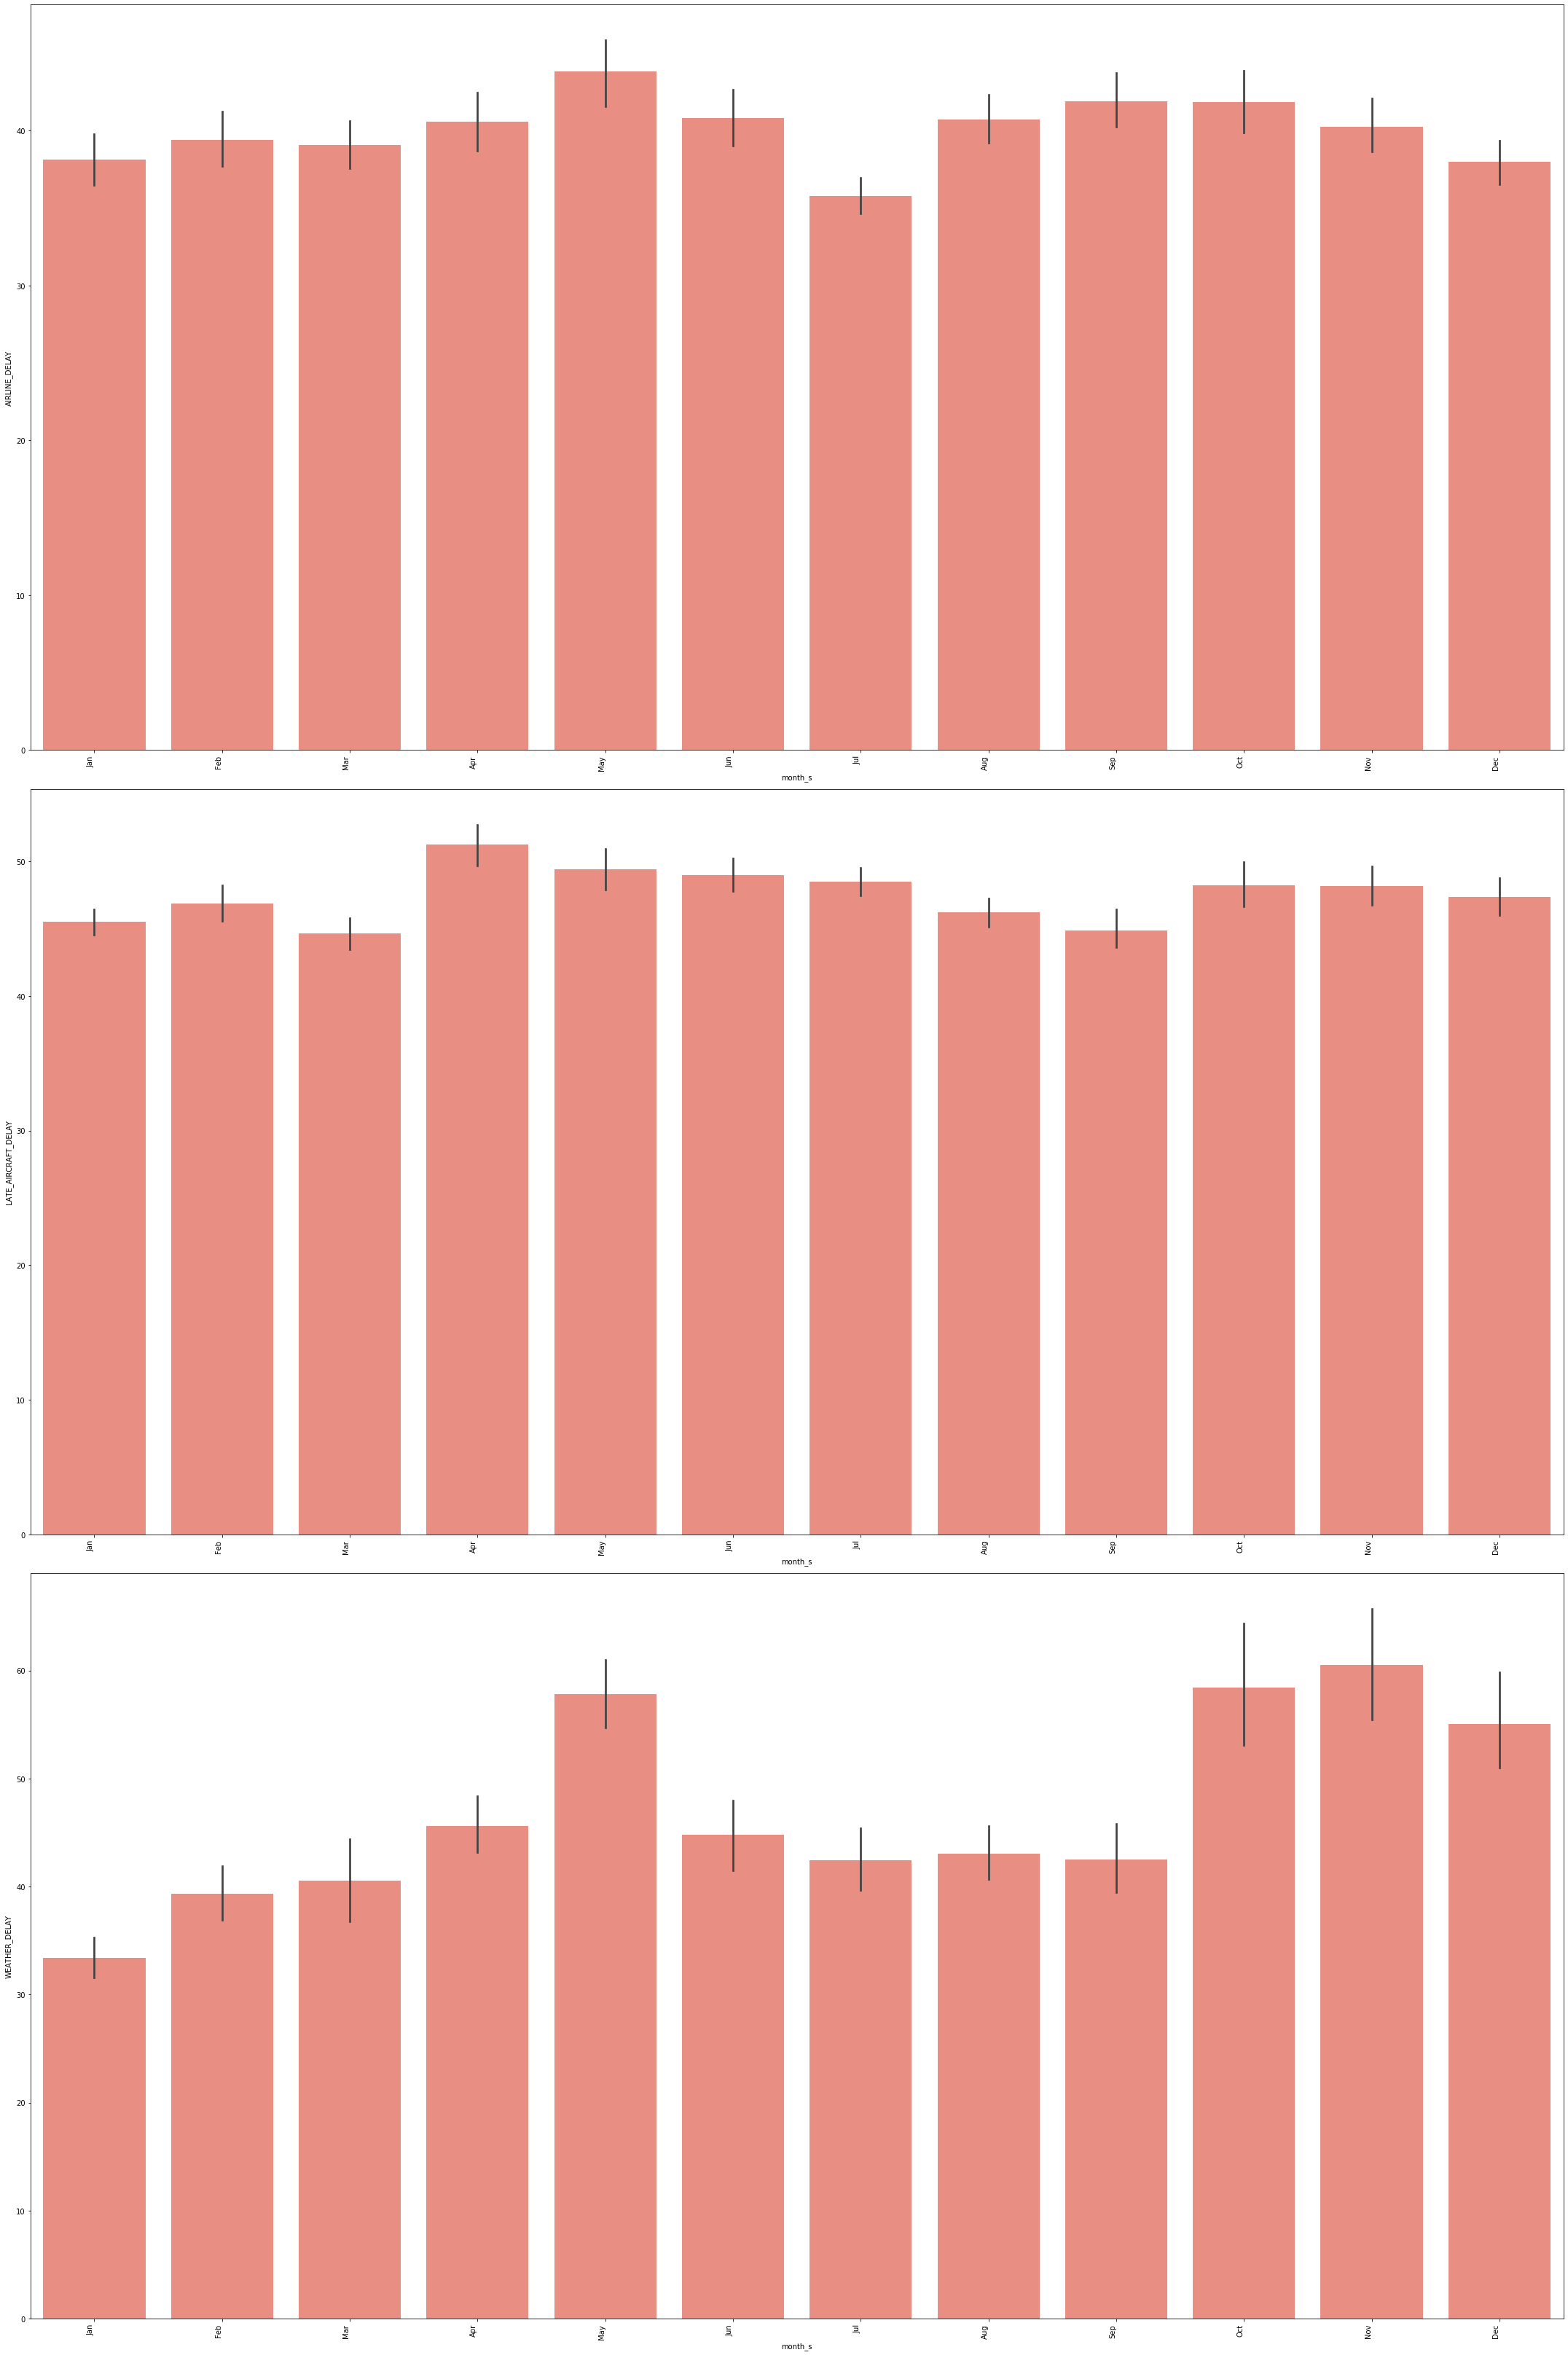

In [27]:
aa_delays = ['AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

fig, axes = plt.subplots(3,1,figsize=(30,45))
#plt.suptitle("Average Delays by Month for American Airline and American Eagle Airline", fontsize=30)
plt.xlabel('Month')
for i, column in enumerate(aa_delays):
    ax = sns.barplot(x='month_s',y=column, data=american_df, ax=axes[i], color='salmon')
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

fig.tight_layout()



<h3><center> Origin and Departure Airport Delays </center></h3>
<ul>
    <li> Looks like most Origin Airport delays are at smaller airports. </li>
    <li> AIRLINE_DELAYS at Origin Airports occur most at Hawaii airports </li>
    <br>
    <li> LATE_AIRCRAFT_DELAYS at Destination Airports occur most in Hawaii airports</li>
    <li> Other Destination Airport delays occure at smaller airports </li>
    <br>
    <li> It looks like AIRLINE_DELAYS at Hawaii airports are caused by LATE_AIRCRAFT_DELAYS. If an flight is late getting into the airport, it makes sense there would be an airline delay at that same airport. </li>
</ul>

**Top 10 Origin Airport Delays**

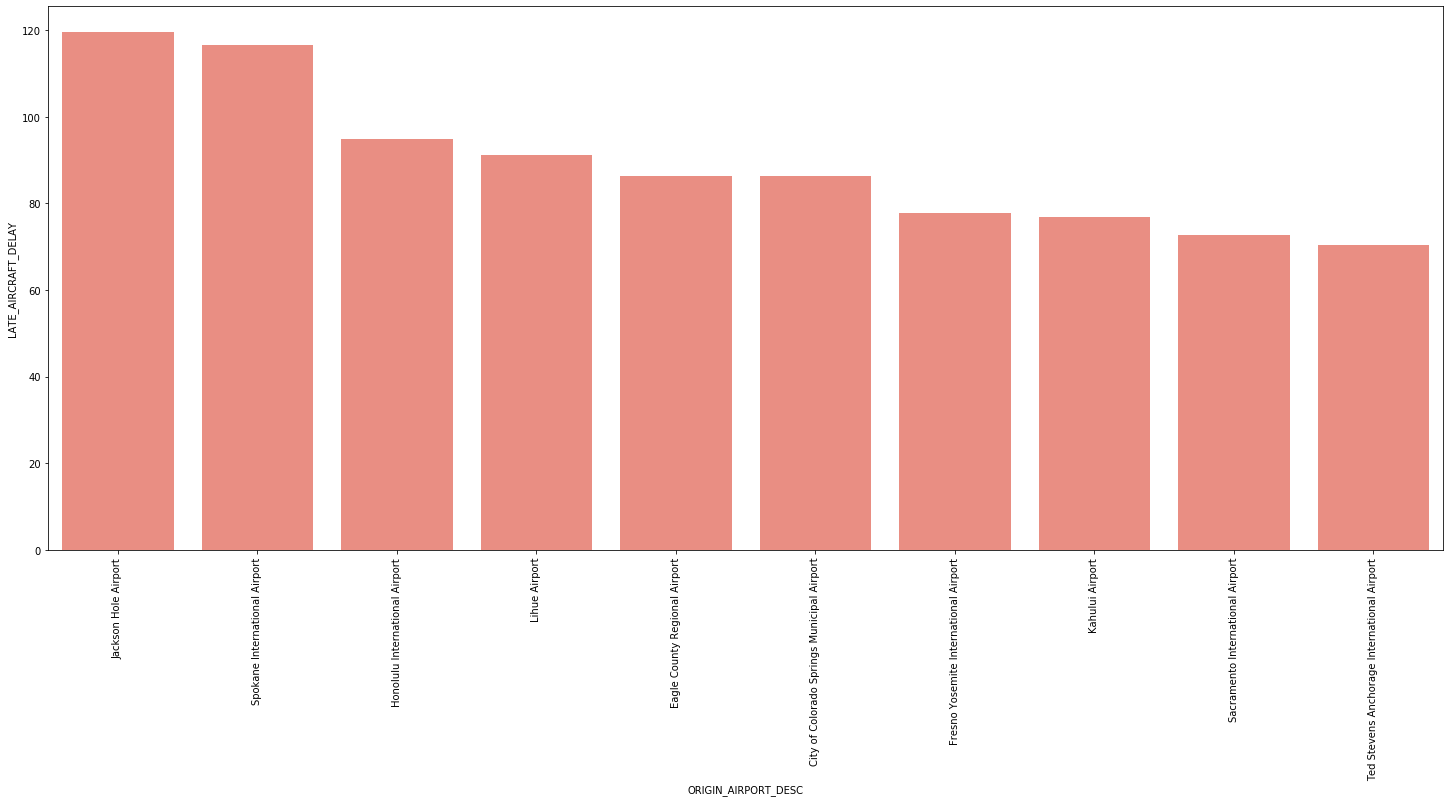

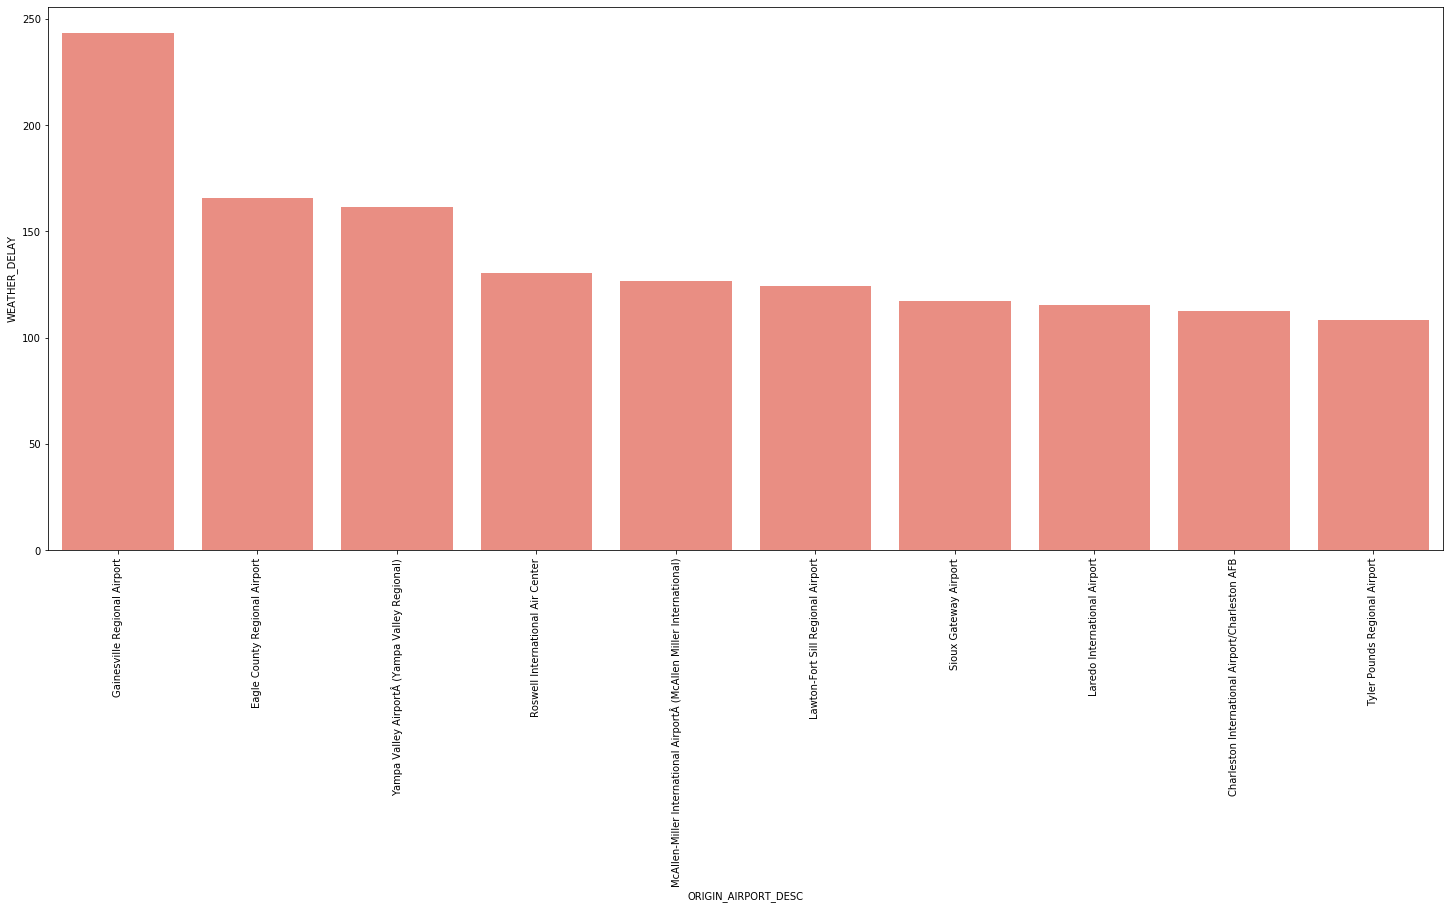

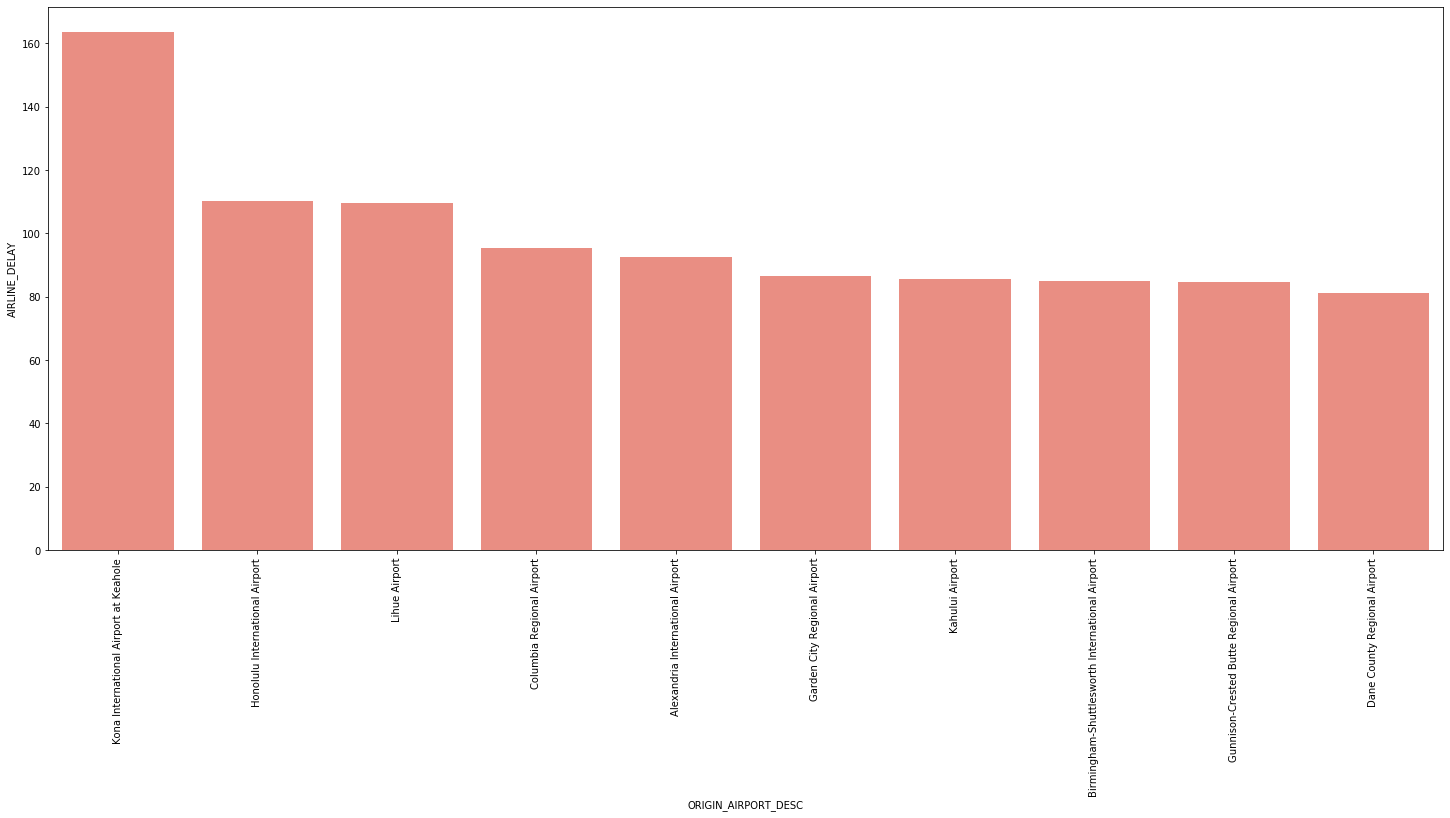

In [28]:
#group 3 delays looking into by origin airport
delayed_origin_americandf = american_df.groupby(["ORIGIN_AIRPORT_DESC"]).mean()[aa_delays] 

late_sorted_origin_americandf = delayed_origin_americandf.sort_values(by=['LATE_AIRCRAFT_DELAY'], ascending=False) #sorting LATE_AIRCRAFT_DELAYS
late_delayed_originairport_top10 = late_sorted_origin_americandf.head(10) #top 10 origin airports with long late aircraft delay
del late_delayed_originairport_top10['AIRLINE_DELAY'] #delete AIRLINE_DELAY
del late_delayed_originairport_top10['WEATHER_DELAY'] #delete WEATHER_DELAY
#graph top 20 origin airports with long LATE_AIRCRAFT_DELAYS
sns.barplot(x=late_delayed_originairport_top10.index, y='LATE_AIRCRAFT_DELAY', data=late_delayed_originairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


weather_sorted_origin_americandf = delayed_origin_americandf.sort_values(by=['WEATHER_DELAY'], ascending=False)
weather_delayed_originairport_top10 = weather_sorted_origin_americandf.head(10) #top 10 origin airports with long  weather delay
del weather_delayed_originairport_top10['AIRLINE_DELAY']
del weather_delayed_originairport_top10['LATE_AIRCRAFT_DELAY']
#graph top 20 origin airports with long WEATHER_DELAYs
sns.barplot(x=weather_delayed_originairport_top10.index, y='WEATHER_DELAY', data=weather_delayed_originairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


airline_sorted_origin_americandf = delayed_origin_americandf.sort_values(by=['AIRLINE_DELAY'], ascending=False)
airline_delayed_originairport_top10 = airline_sorted_origin_americandf.head(10) #top 10 origin airports with long airline delay
del airline_delayed_originairport_top10['LATE_AIRCRAFT_DELAY']
del airline_delayed_originairport_top10['WEATHER_DELAY']
#graph top 20 origin airports with long AIRLINE_DELAYs
sns.barplot(x=airline_delayed_originairport_top10.index, y='AIRLINE_DELAY', data=airline_delayed_originairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


#print(late_delayed_originairport_top10)
#print(weather_delayed_originairport_top10)
#print(airline_delayed_originairport_top10)


**Top 10 Departure Airport Delays**

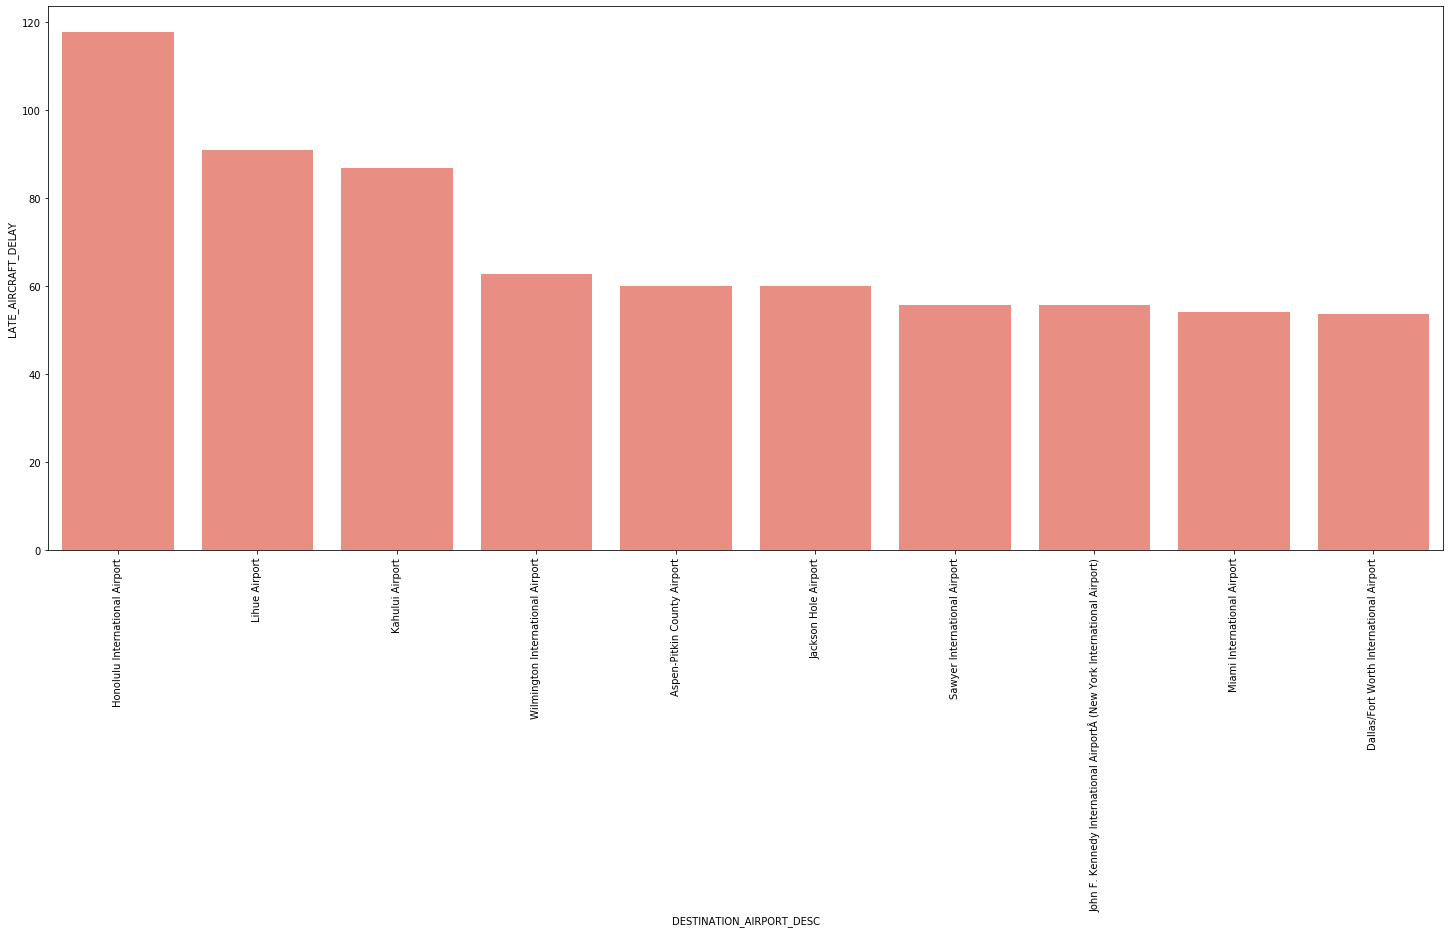

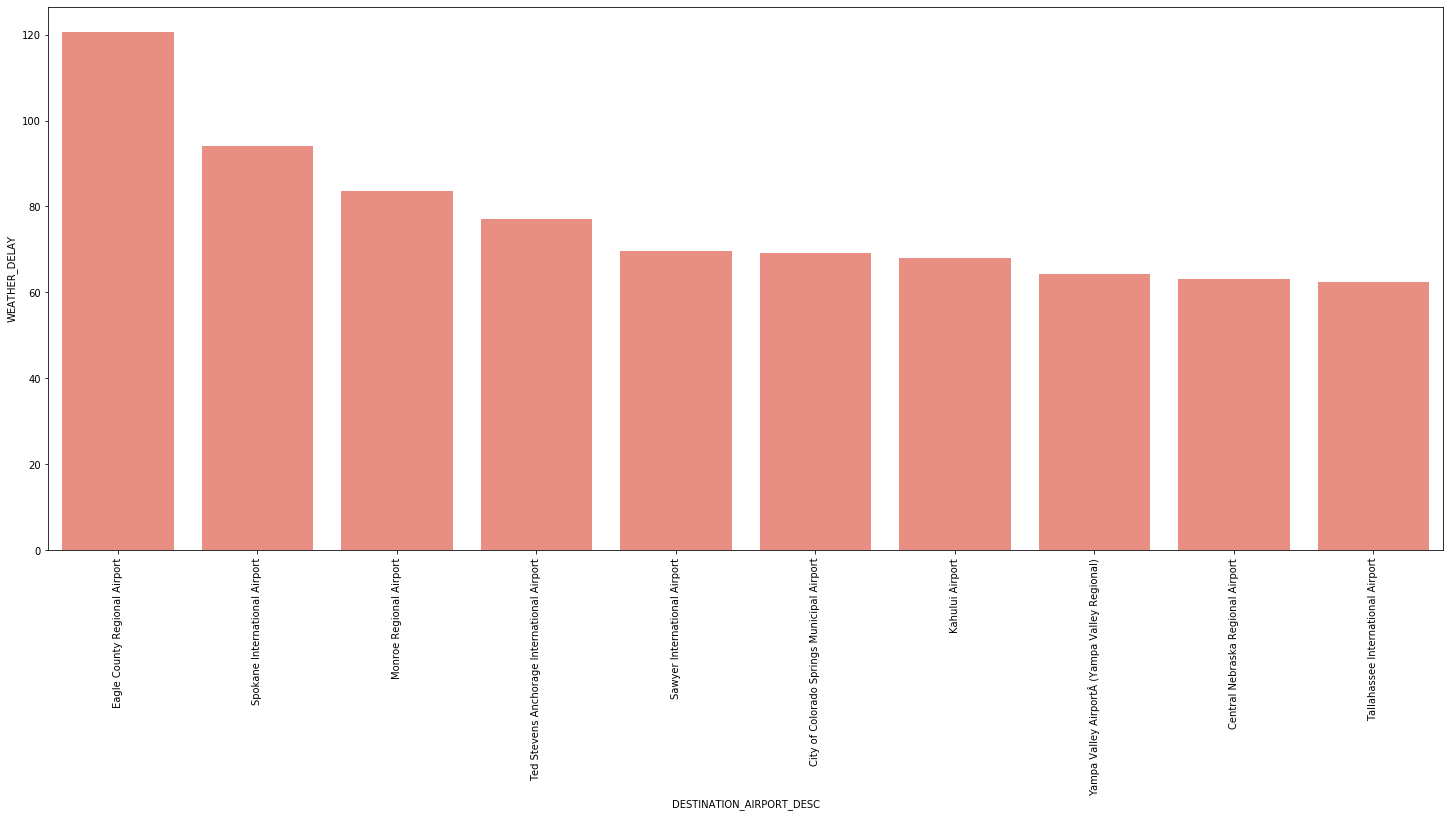

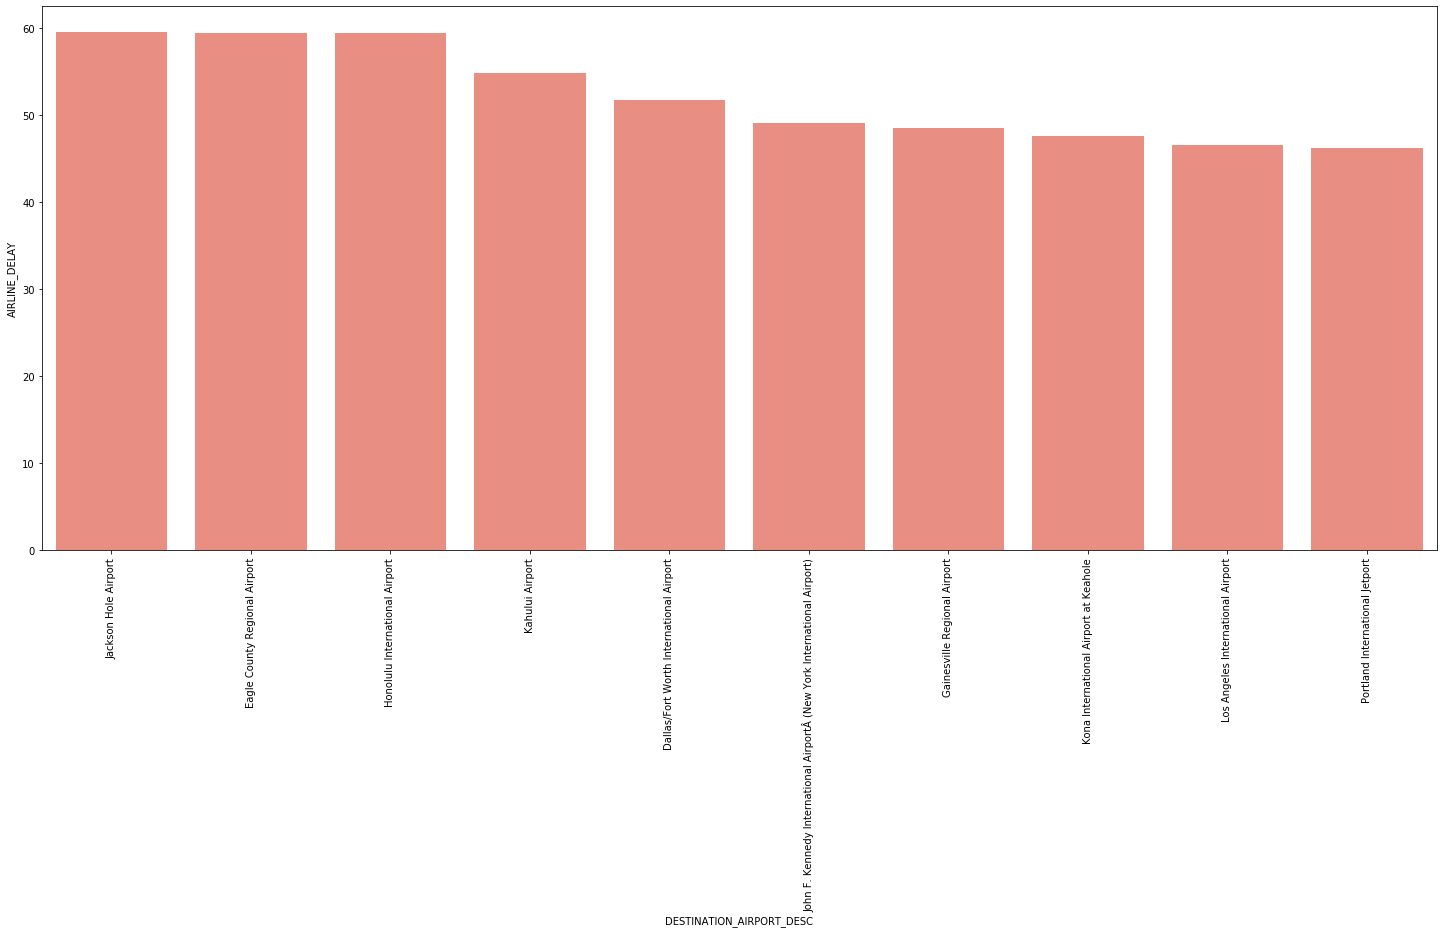

In [29]:
#group 3 delays looking into by origin airport
delayed_destination_americandf = american_df.groupby(["DESTINATION_AIRPORT_DESC"]).mean()[aa_delays] 

late_sorted_destination_americandf = delayed_destination_americandf.sort_values(by=['LATE_AIRCRAFT_DELAY'], ascending=False) #sorting LATE_AIRCRAFT_DELAYS
late_delayed_destinationairport_top10 = late_sorted_destination_americandf.head(10) #top 10 origin airports with long late aircraft delay
del late_delayed_destinationairport_top10['AIRLINE_DELAY'] #delete AIRLINE_DELAY
del late_delayed_destinationairport_top10['WEATHER_DELAY'] #delete WEATHER_DELAY
#graph top 20 origin airports with long LATE_AIRCRAFT_DELAYS
sns.barplot(x=late_delayed_destinationairport_top10.index, y='LATE_AIRCRAFT_DELAY', data=late_delayed_destinationairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


weather_sorted_destination_americandf = delayed_destination_americandf.sort_values(by=['WEATHER_DELAY'], ascending=False)
weather_delayed_destinationairport_top10 = weather_sorted_destination_americandf.head(10) #top 10 origin airports with long  weather delay
del weather_delayed_destinationairport_top10['AIRLINE_DELAY']
del weather_delayed_destinationairport_top10['LATE_AIRCRAFT_DELAY']
#graph top 20 origin airports with long WEATHER_DELAYs
sns.barplot(x=weather_delayed_destinationairport_top10.index, y='WEATHER_DELAY', data=weather_delayed_destinationairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


airline_sorted_destination_americandf = delayed_destination_americandf.sort_values(by=['AIRLINE_DELAY'], ascending=False)
airline_delayed_destinationairport_top10 = airline_sorted_destination_americandf.head(10) #top 10 origin airports with long airline delay
del airline_delayed_destinationairport_top10['LATE_AIRCRAFT_DELAY']
del airline_delayed_destinationairport_top10['WEATHER_DELAY']
#graph top 20 origin airports with long AIRLINE_DELAYs
sns.barplot(x=airline_delayed_destinationairport_top10.index, y='AIRLINE_DELAY', data=airline_delayed_destinationairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()

<h3><center> Arrival and Departure Delays by Origin and Destination Airports </center></h3>
<ul>
    <li> The following airports experience arrival and departure delays and it would be recommended to allow more time between flights at these airports. </li>
    <ol>
        <li> Aspen-Pitkin County Airport </li>
        <li> Brownsville/South Padre Island International Airport </li>
        <li> Jack Brooks Regional Airport </li>
    </ol>
</ul>

**Top 10 origin airports with late arrivals and late departures**

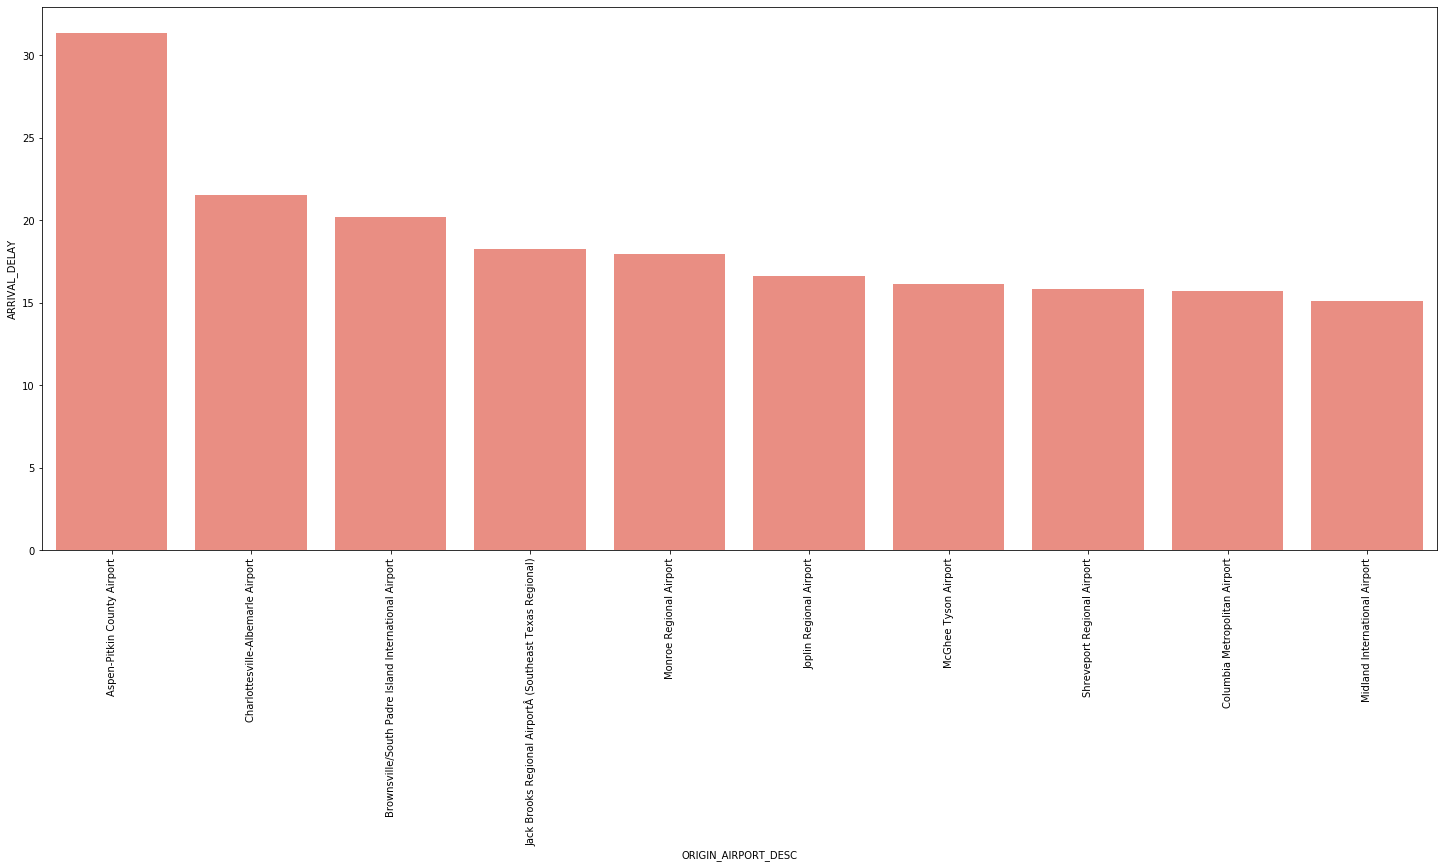

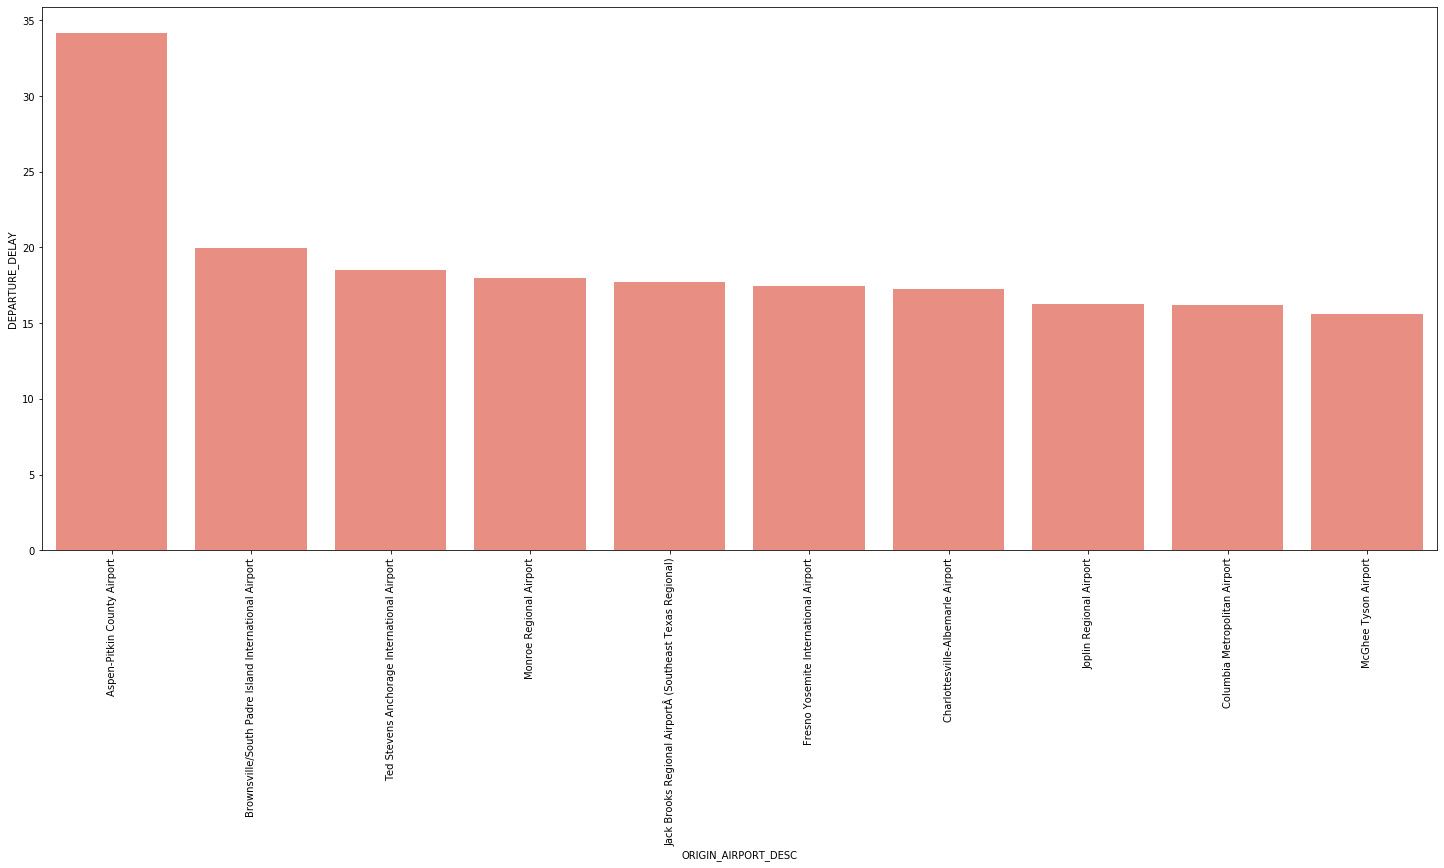

In [30]:
#create variable and dataframe for arrival and departure delays
arr_dep_delays = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY']
arr_dep_origin_americandf = american_df.groupby(["ORIGIN_AIRPORT_DESC"]).mean()[arr_dep_delays]

arrival_sorted_origin_americandf = arr_dep_origin_americandf.sort_values(by=['ARRIVAL_DELAY'], ascending=False) #sorting LATE_AIRCRAFT_DELAYS
arrival_delayed_originairport_top10 = arrival_sorted_origin_americandf.head(10) #top 10 origin airports with long late aircraft delay
del arrival_delayed_originairport_top10['DEPARTURE_DELAY'] #delete AIRLINE_DELAY
#graph top 20 origin airports with long LATE_AIRCRAFT_DELAYS
sns.barplot(x=arrival_delayed_originairport_top10.index, y='ARRIVAL_DELAY', data=arrival_delayed_originairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


departure_sorted_origin_americandf = arr_dep_origin_americandf.sort_values(by=['DEPARTURE_DELAY'], ascending=False) #sorting LATE_AIRCRAFT_DELAYS
departure_delayed_originairport_top10 = departure_sorted_origin_americandf.head(10) #top 10 origin airports with long late aircraft delay
del departure_delayed_originairport_top10['ARRIVAL_DELAY'] #delete AIRLINE_DELAY
#graph top 20 origin airports with long LATE_AIRCRAFT_DELAYS
sns.barplot(x=departure_delayed_originairport_top10.index, y='DEPARTURE_DELAY', data=departure_delayed_originairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


**Top 10 destination airports with late arrivals and late departures**

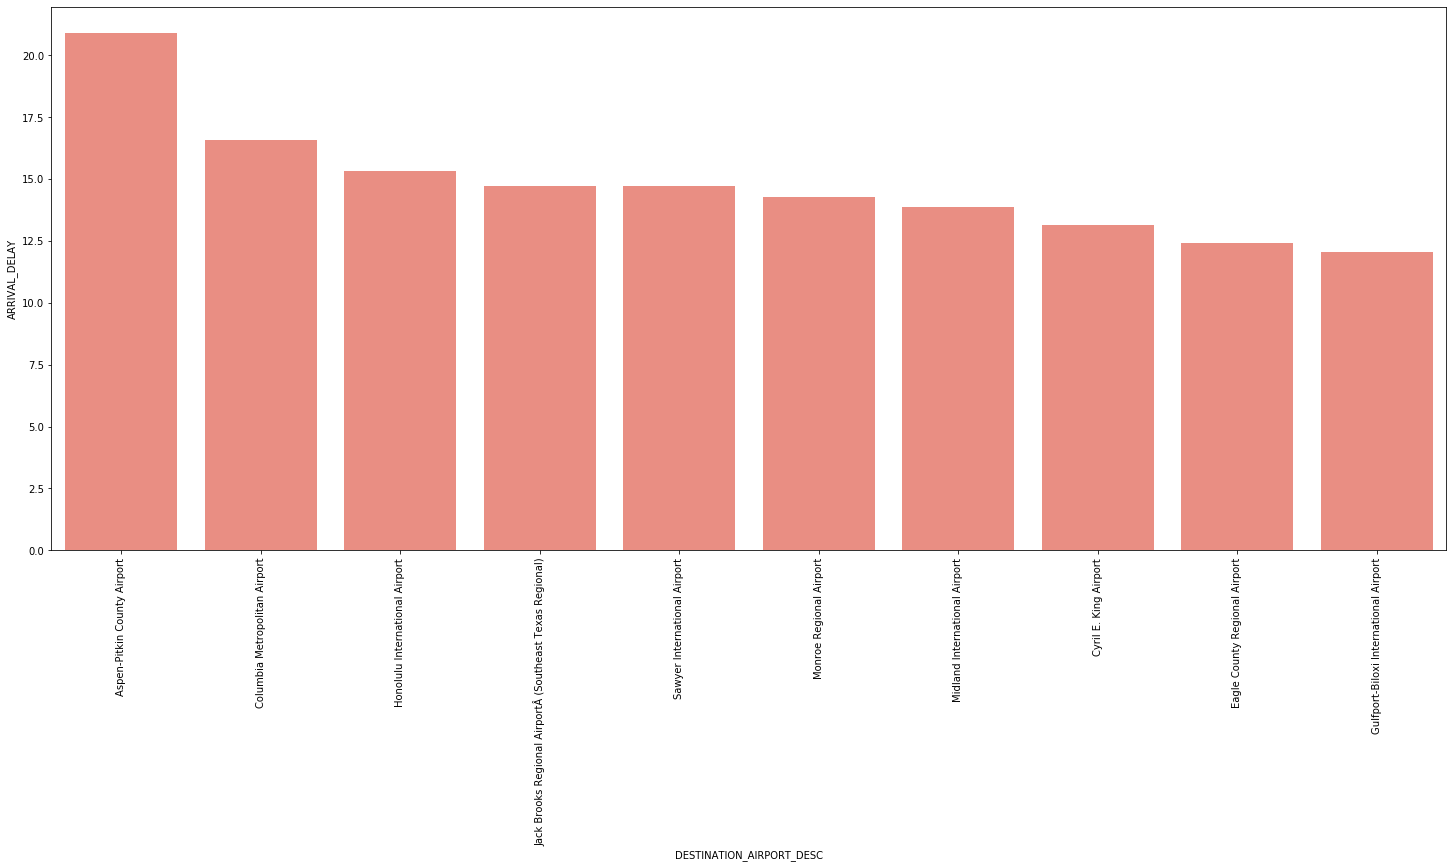

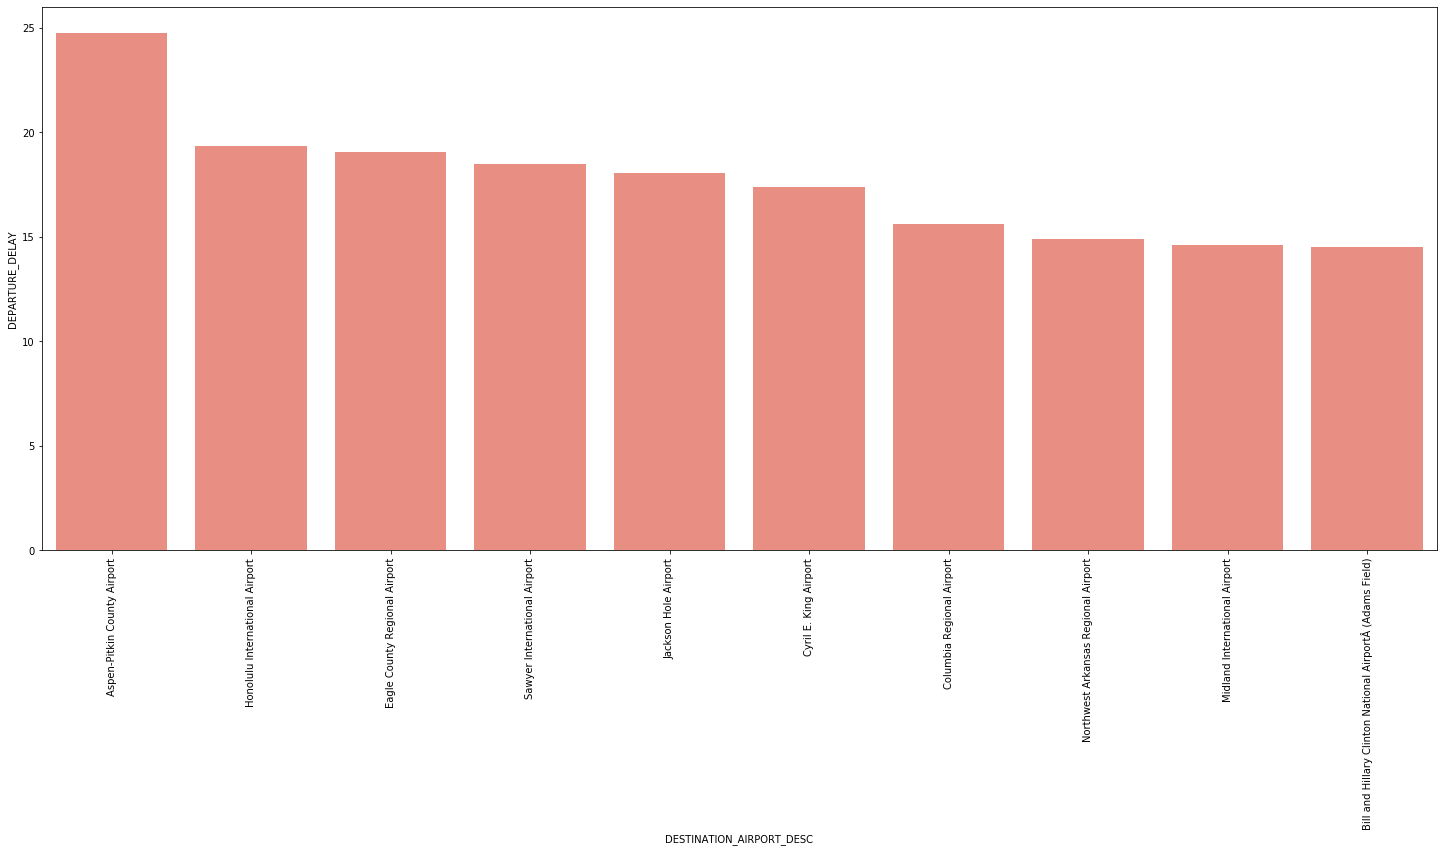

In [31]:
arr_dep_destination_americandf = american_df.groupby(["DESTINATION_AIRPORT_DESC"]).mean()[arr_dep_delays]

arrival_sorted_destination_americandf = arr_dep_destination_americandf.sort_values(by=['ARRIVAL_DELAY'], ascending=False) #sorting arrival delays
arrival_delayed_destinationairport_top10 = arrival_sorted_destination_americandf.head(10) #top 10 destination airports with late arrivals
del arrival_delayed_destinationairport_top10['DEPARTURE_DELAY'] #delete departure delays
#graph top 10 origin airports with late arrivals
sns.barplot(x=arrival_delayed_destinationairport_top10.index, y='ARRIVAL_DELAY', data=arrival_delayed_destinationairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()


departure_sorted_destination_americandf = arr_dep_destination_americandf.sort_values(by=['DEPARTURE_DELAY'], ascending=False) #sorting departure delays
departure_delayed_destinationairport_top10 = departure_sorted_destination_americandf.head(10) #top 10 destination airports with late departures
del departure_delayed_destinationairport_top10['ARRIVAL_DELAY'] #delete arrival delays
#graph top 10 destination airports with late departures
sns.barplot(x=departure_delayed_destinationairport_top10.index, y='DEPARTURE_DELAY', data=departure_delayed_destinationairport_top10, color='salmon') 
plt.xticks(rotation=90)
plt.show()

<h2><center> Descriptive Statistics of Delay Variables for American Airlines and American Eagle Airlines </center></h2>

In [32]:
american_df[delays].describe()

,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,ARRIVAL_DELAY,DEPARTURE_DELAY
count,95892.000000,89715.000000,19072.000000,106189.000000,1039.00000,991726.000000,995880.000000
mean,39.722052,47.376414,45.602192,25.344763,22.33590,4.296551,9.245434
std,77.171346,56.286712,66.419187,31.048530,23.60272,44.341210,41.544189
min,1.000000,1.000000,1.000000,1.000000,1.00000,-87.000000,-68.000000
25%,9.000000,16.000000,10.000000,8.000000,8.00000,-15.000000,-5.000000
50%,20.000000,30.000000,24.000000,17.000000,16.00000,-6.000000,-2.000000
75%,43.000000,59.000000,55.000000,30.000000,26.00000,8.000000,6.000000
max,1971.000000,1331.000000,1152.000000,1134.000000,190.00000,1971.000000,1988.000000


<h3><center> Boxplots </center></h3>
<ul>
    <li> Delay variables for American Airline and American Eagle Airline look very similar to boxplots for all airlines</li>
    <li> Delay variables all have a large range from min to max points</li>
    <li> Each delay variable looks to have a lot of outliers meaning when a delay occurs, it rarely lasts long</li>
</ul>


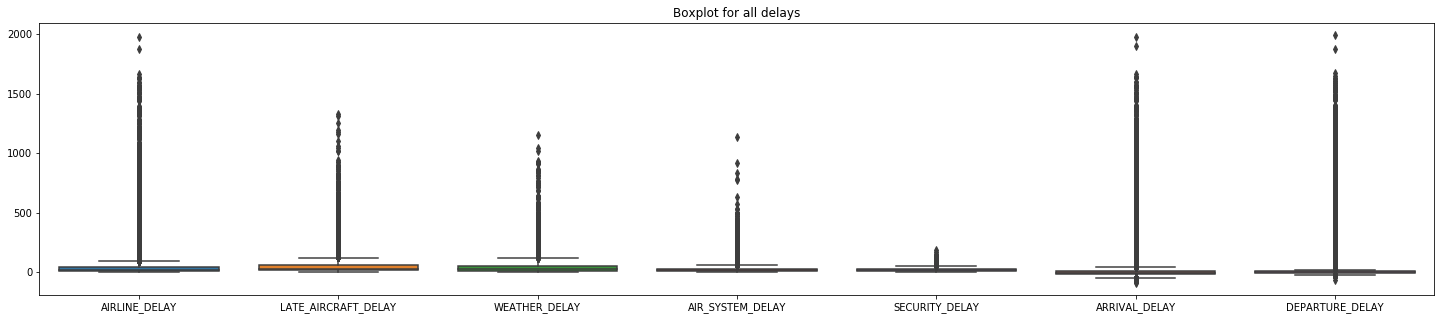

In [33]:
plt.figure(figsize=(25,5))
sns.boxplot(data=american_df[delays])
plt.title('Boxplot for all delays')
plt.show()

<h3><center> Histograms </center></h3>
<ul>
    <li> All histograms are skewed to the right </li>
    <li> When delays occur, on average, they do no last long </li>
    <li> SECURITY_DELAY does have more variation than other delay variables </li>
</ul>

C:\Users\kirst\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kirst\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


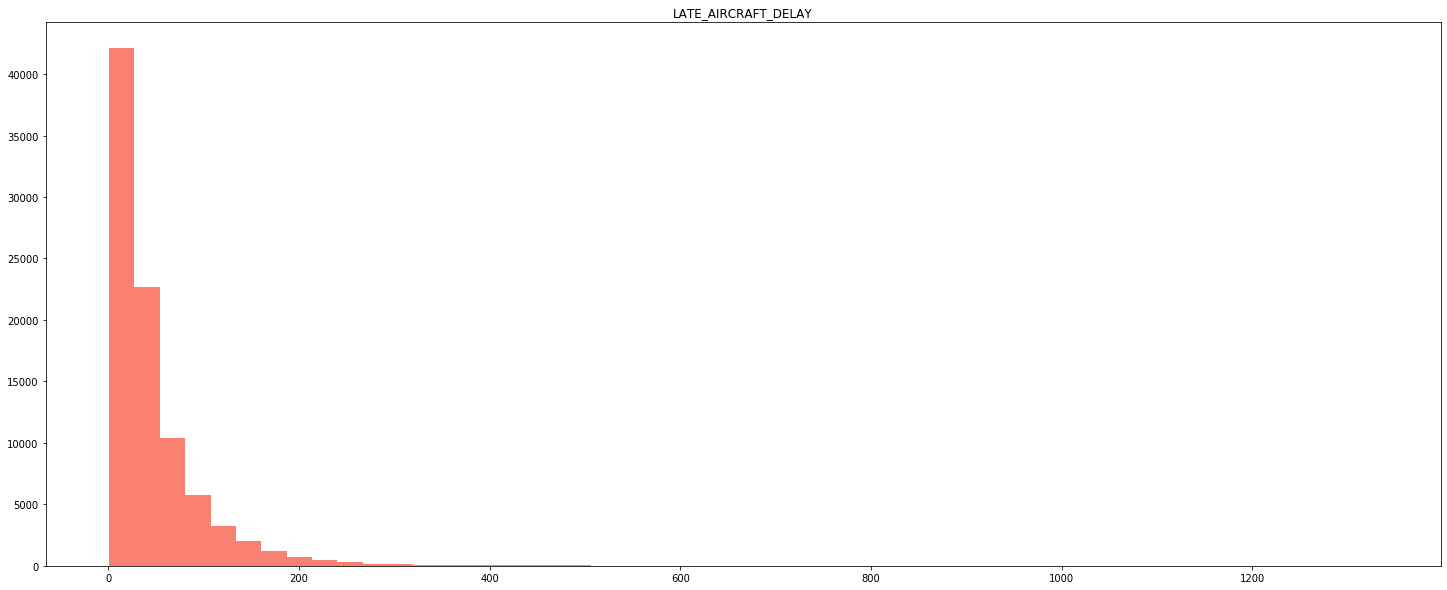

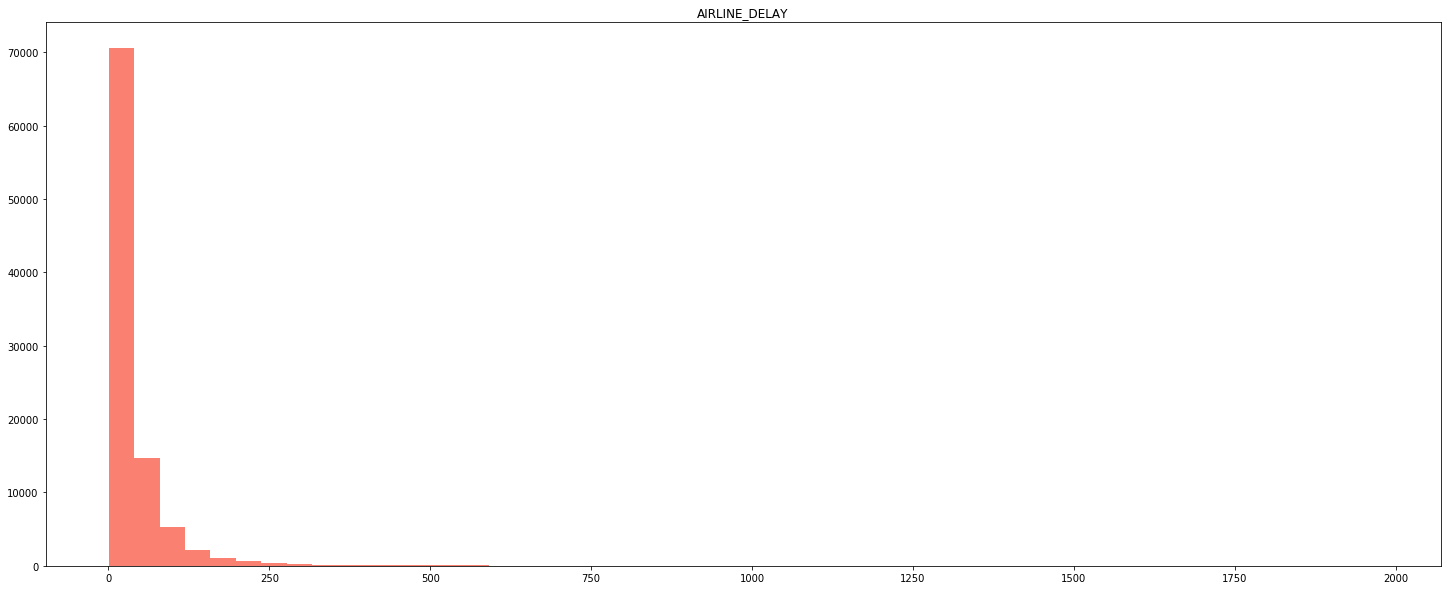

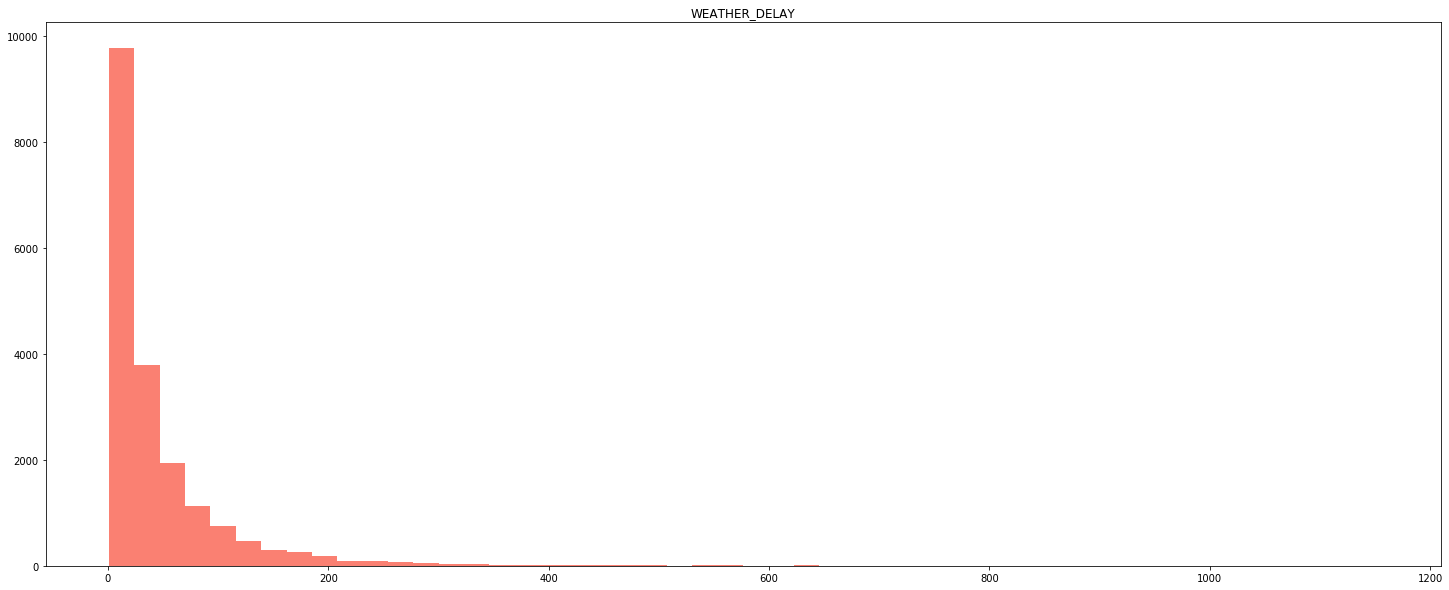

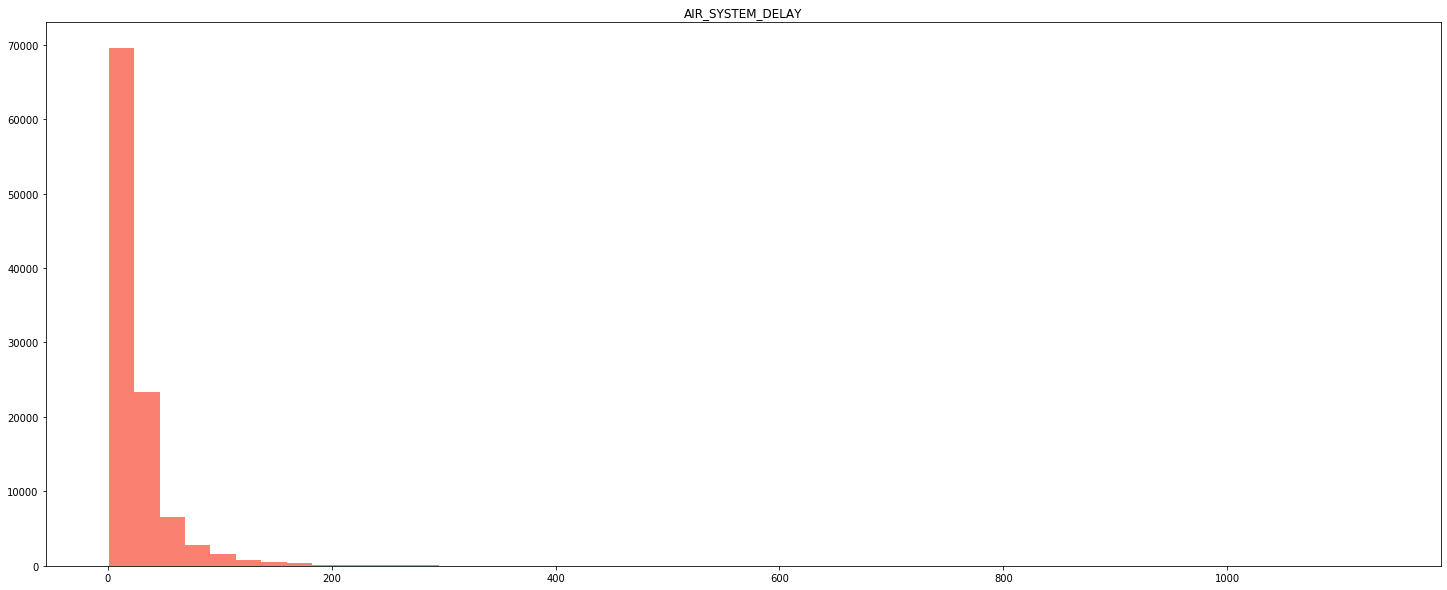

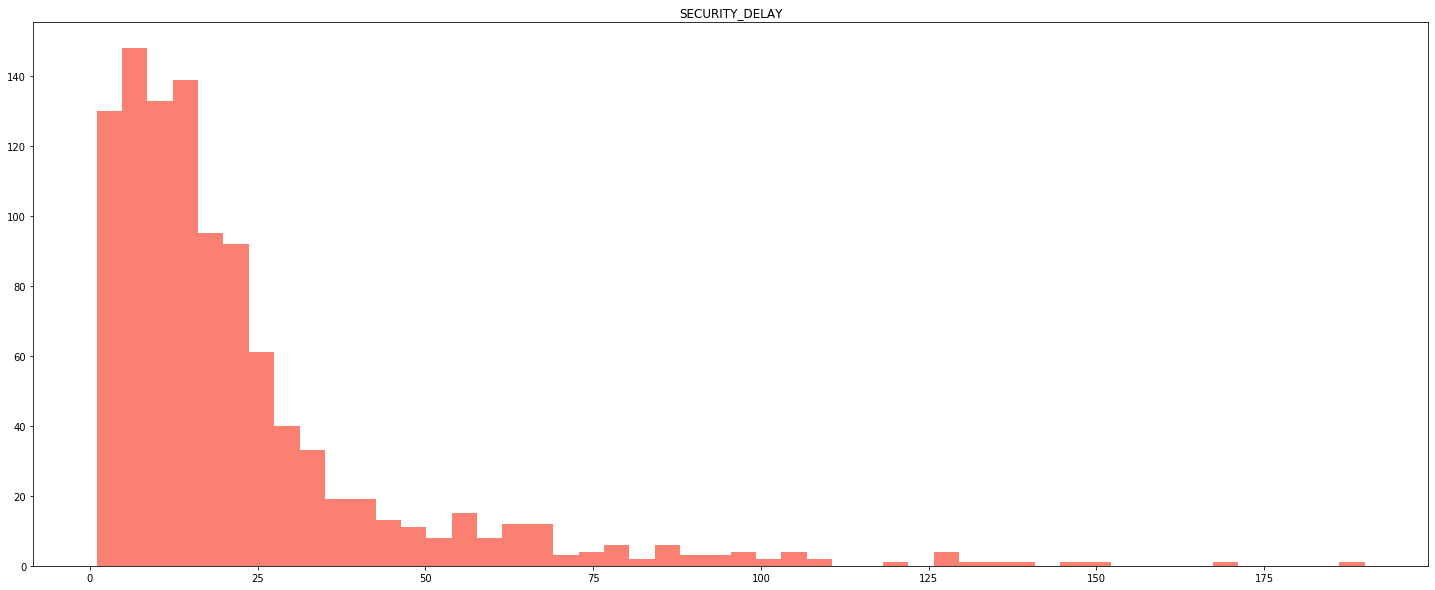

In [34]:
plt.title('LATE_AIRCRAFT_DELAY')
plt.hist(american_df['LATE_AIRCRAFT_DELAY'], bins=50, color='salmon')
plt.show()

plt.title('AIRLINE_DELAY')
plt.hist(american_df['AIRLINE_DELAY'], bins=50, color='salmon')
plt.show()

plt.title('WEATHER_DELAY')
plt.hist(american_df['WEATHER_DELAY'], bins=50, color='salmon')
plt.show()

plt.title('AIR_SYSTEM_DELAY')
plt.hist(american_df['AIR_SYSTEM_DELAY'], bins=50, color='salmon')
plt.show()

plt.title('SECURITY_DELAY')
plt.hist(american_df['SECURITY_DELAY'], bins=50, color='salmon')
plt.show()